<a href="https://colab.research.google.com/github/kirangang/CardioVascular-Risk-Prediction/blob/main/ML_Case_Study_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - **Cardiovascular Risk Prediction**



##### **Project Type**    - Classification  
##### **Contribution**    - Individual  

# **Project Summary -**

This project is related to cardiovascular disease risk prediction. The goal of this project was to use machine learning techniques to predict the 10-year risk of future coronary heart disease (CHD) in patients using data from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts.The dataset provided information on over 3,000 patients and included 15 attributes, each representing a potential risk factor for CHD. These attributes included demographic, behavioral, and medical risk factors.  

To prepare the data for analysis, extensive preprocessing was performed to clean and transform the data. This included handling missing values using median, mode, and KNN imputation techniques, as well as identifying and removing outliers using the Interquartile Range (IQR) method.

A new featured called pulse pressure was created to capture the relationship between systolic and diastolic blood pressure. To avoid overfitting, redundant column 'is_smoking' was also removed. The most important features for predicting CHD risk were identified as ‘age’, ‘sex’, ‘education’, ‘cigs_per_day’, ‘bp_meds’, ‘prevalent_stroke’, ‘prevalent_hyp’, ‘diabetes’, ‘total_cholesterol’, ‘bmi’, ‘heart_rate’, ‘glucose’, and ‘pulse_pressure’.  

To handle the imbalanced nature of the dataset, the SMOTE combined with Tomek links undersampling technique was used to balance the class distribution and improve model performance. The data was also scaled using standardscalar method to ensure that all features were on the same scale.  

Several machine learning models were evaluated on their performance on the primary evaluation metric of Recall. After careful analysis, the SVM and Decision Tree performed well in terms of Recall score. The goal was to correctly identify as many patients with CHD risk as possible, even if it meant having some false positives.  

Overall, this project demonstrated the potential of machine learning techniques to accurately predict CHD risk in patients using data from a cardiovascular study. By carefully preprocessing and transforming the data, selecting relevant features, and choosing an appropriate model based on its performance on a relevant evaluation metric, it was possible to achieve a positive business impact by accurately predicting CHD risk in patients.  

# **Problem Statement**


Cardiovascular disease (CVD) remains a significant global health concern, contributing to high rates of morbidity and mortality. Timely identification of individuals at risk of developing CVD is crucial for implementing preventive measures and improving patient outcomes.

Machine learning (ML) offers a promising approach to develop predictive models for assessing cardiovascular risk. However, the challenge lies in creating models that are both accurate and generalizable across diverse populations.

This project aims to develop a robust ML algorithm for accurately predicting cardiovascular risk in patients based on clinical and demographic data. The primary objectives include:

* Identifying the key risk factors associated with CVD and incorporating them into the predictive model.
* Evaluating the effectiveness of various ML algorithms in detecting and classifying cardiovascular risk, and optimizing their performance.
* Validating and testing the predictive model on independent datasets to assess its generalizability and real-world performance.

Through the application of advanced ML techniques and rigorous validation methods, this project aims to contribute to the development of accurate and reliable tools for cardiovascular risk assessment. Ultimately, the implementation of such predictive models can lead to significant advancements in preventive cardiology and public health.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Importing required libraries

# Data manipulation and analysis
import numpy as np
import pandas as pd
from numpy import loadtxt

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data preprocessing
from sklearn.preprocessing import StandardScaler

# Hypothesis testing
from scipy.stats import chi2_contingency

# Data splitting
from sklearn.model_selection import train_test_split

# Model evaluation metrics
from sklearn.metrics import (accuracy_score, precision_score, recall_score, roc_auc_score, f1_score,
                             confusion_matrix, roc_curve, classification_report)

# Classification algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb

# Model evaluation and optimization
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

# Handling imbalanced data
from imblearn.combine import SMOTETomek

# Cross-validation
from sklearn.model_selection import StratifiedKFold

# Suppressing warnings
import warnings
warnings.filterwarnings('ignore')


### Dataset Loading

In [ ]:
# Connecting the google colab notebook with the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset to be analysed
data = pd.read_csv('/content/drive/MyDrive/cardiovascular_risk_data.csv')

### Dataset First View

In [ ]:
# Shows first 5 rows
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
# Shows last 5 rows
data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
data.shape

(3390, 17)

### Dataset Information

In [ ]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

<Axes: >

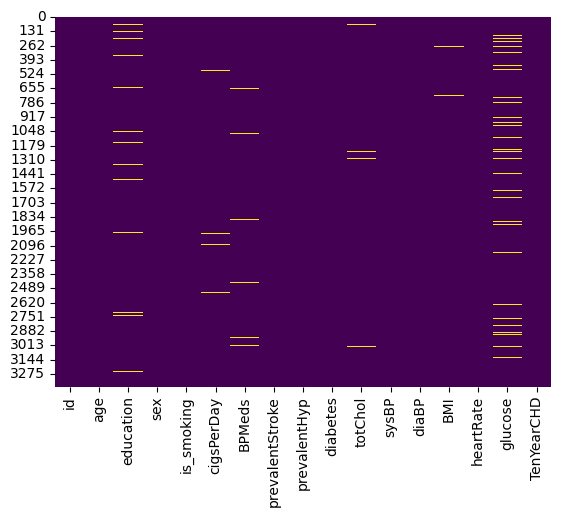

In [ ]:
# Visualizing the missing values
sns.heatmap(data.isnull(), cmap='viridis', cbar=False)

### What did you know about your dataset?

* The above dataset is about cardiovascular risk prediction, where we are predicting 10-year risk of coronary heart disease (CHD).
* The dataset has 3390 rows and 17 columns.
* There are no duplicate rows present in the dataset.
* There are some null values present in certain columns.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
data.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [ ]:
# Describe numerical variables
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
# Describe categorical variables
data.describe(include=['object','category'])

,sex,is_smoking
count,3390,3390
unique,2,2
top,F,NO
freq,1923,1703


### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
data.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

### Variables Description

There are total 17 variables present in the dataset, whereas excluding id column we have 16 variables. Out of these 16 variables, one is our target variable, while the remaining 15 represent potential risk factors for coronary heart disease. These 15 variables can be categorised into 3 types, which are demographic, behavioral and medical.

**Demographic**
* Sex: Gender of the person ("M" or "F").
* Age: Age of the person (Continuous)
* Education (Discrete)

**Behavorial**
* is_smoking: Is the person smoking or not ("YES" or "NO")
* Cigs_per_Day: The number of cigarettes that the person smoke on an average in one day.

**Medical**
* BPMeds: whether or not the patient was on blood pressure medication (Nominal)
* Prevalent_stroke: whether or not the patient has previously had a stroke.(Nominal)
* Prevalent_hyp:  whether or not the patient was hypertensive (Nominal)
* Diabetes: whether the patient is diabetic or not (Nominal)
* Tot Chol: total cholesterol level (Continuous)
* Sys BP: systolic blood pressure (Continuous)
* Dia BP: diastolic blood pressure (Continuous)
* BMI: Body Mass Index (Continuous)
* Heart Rate: heart rate (Continuous)
* Glucose: glucose level (Continuous)

**Target variable (desired target)**
* TenYearCHD: 10-year risk of coronary heart disease CHD (binary: “1” means “Yes”, “0” means “No”) - Dependent Variable (DV)

## 3. ***Data Wrangling***

In [ ]:
# Creating a copy of our dataset
df = data.copy()

In [ ]:
# Dropping the id column
df.drop('id',axis=1,inplace=True)

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


### Let's now deal with null values

In [ ]:
# Checking for null values
df.isnull().sum()

age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

Based on the unique values in each column, we will classify variables into categorical and continuous types. Variables with four or fewer unique values, will be categorized as categorical, while the remaining variables will be classified as continuous.

In [ ]:
# Distinguishing categorical and continuous variables
categorical=[i for i in df.columns if df[i].nunique()<=4]
print(categorical)
continuous=[i for i in df.columns if df[i].nunique()>4]
print(continuous)

['education', 'sex', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'TenYearCHD']
['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


In [ ]:
# Importing imputers
from sklearn.impute import SimpleImputer, KNNImputer

In [ ]:
# Applying imputer on categorical columns
most_frequent = SimpleImputer(strategy = 'most_frequent')
most_frequent.fit(df[categorical])
df[categorical] = most_frequent.transform(df[categorical])

In [ ]:
# Applying imputer on continuous columns
knn_impute  = KNNImputer(n_neighbors = 3)
knn_impute.fit(df[continuous])
df[continuous] = knn_impute.transform(df[continuous])

In [ ]:
# Checking null values
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### We can see that there are no null values present now.

## Mapping categorical variables to numerical values.

In [ ]:
# Define dictionaries to map categorical values to numerical codes.
sex_dict = {'M': 0, 'F': 1}
is_smoking = {'NO': 0, 'YES': 1}

# Use the map function to replace categorical values with numerical codes.
df['sex'] = df['sex'].map(sex_dict)
df['is_smoking'] = df['is_smoking'].map(is_smoking)

In [ ]:
df.head()

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64.0,2.0,1,1,3.0,0.0,0,0,0,221.0,148.0,85.0,30.913333,90.0,80.0,1
1,36.0,4.0,0,0,0.0,0.0,0,1,0,212.0,168.0,98.0,29.770000,72.0,75.0,0
2,46.0,1.0,1,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.350000,88.0,94.0,0
3,50.0,1.0,0,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.260000,68.0,94.0,1
4,64.0,1.0,1,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.420000,70.0,77.0,0


In [ ]:
# Getting some insight when TenYearCHD == 1
df_output_1 = df[df['TenYearCHD'] == 1]
print('Avg age of people with heart stroke is:', df_output_1['age'].mean().round())
print('Avg cigarette by people with heart stroke is:', df_output_1['cigsPerDay'].mean().round())
print('Percentage of people with heart stroke who are on BP medication:', round(len(df_output_1[df_output_1['BPMeds'] == 1]) / len(df_output_1) * 100, 2), '%')
print('Percentage of people with heart stroke who have prevalent strokes:', round(len(df_output_1[df_output_1['prevalentStroke'] == 1]) / len(df_output_1) * 100, 2), '%')
print('Percentage of people with heart stroke who have prevalent hypertension:', round(len(df_output_1[df_output_1['prevalentHyp'] == 1]) / len(df_output_1) * 100, 2), '%')
print('Percentage of people with heart stroke who have diabetes:', round(len(df_output_1[df_output_1['diabetes'] == 1]) / len(df_output_1) * 100, 2), '%')
print('Avg cholesterol of heart stroke patients is:', df_output_1['totChol'].mean().round())
print('Avg systolic BP of heart stroke patients is:', df_output_1['sysBP'].mean().round())
print('Avg diastolic BP of heart stroke patients is:', df_output_1['diaBP'].mean().round())
print('Avg BMI of heart stroke patients is:', df_output_1['BMI'].mean().round())
print('Avg heart rate of heart stroke patients is:', df_output_1['heartRate'].mean().round())
print('Avg glucose of heart stroke patients is:', df_output_1['glucose'].mean().round())

Avg age of people with heart stroke is: 54.0
Avg cigarette by people with heart stroke is: 11.0
Percentage of people with heart stroke who are on BP medication: 6.46 %
Percentage of people with heart stroke who have prevalent strokes: 1.96 %
Percentage of people with heart stroke who have prevalent hypertension: 49.9 %
Percentage of people with heart stroke who have diabetes: 6.46 %
Avg cholesterol of heart stroke patients is: 247.0
Avg systolic BP of heart stroke patients is: 144.0
Avg diastolic BP of heart stroke patients is: 87.0
Avg BMI of heart stroke patients is: 26.0
Avg heart rate of heart stroke patients is: 77.0
Avg glucose of heart stroke patients is: 89.0


In [ ]:
# Getting some insight when TenYearCHD == 0
df_output_0 = df[df['TenYearCHD'] == 0]
print('Avg age of people with no heart stroke is: ', df_output_0['age'].mean().round())
print('Avg cigarette by people with no heart stroke is: ', df_output_0['cigsPerDay'].mean().round())
print('Percentage of people with no heartstroke who has BP medication on are: ', round(len(df_output_0[df_output_0['BPMeds'] == 1]) / len(df_output_0) * 100, 2),'%')
print('Percentage of people with no heartstroke who has prevalent strokes are: ', round(len(df_output_0[df_output_0['prevalentStroke'] == 1]) / len(df_output_0) * 100, 2), '%')
print('Percentage of people with no heartstroke who has prevalent hypertension  are: ', round(len(df_output_0[df_output_0['prevalentHyp'] == 1]) / len(df_output_0)* 100, 2), '%')
print('Percentage of people with no heartstroke who has Diabetes are: ', round(len(df_output_0[df_output_0['diabetes'] == 1]) / len(df_output_0) * 100, 2), '%')
print('Avg cholestrol of non-heartstroke patients is: ', df_output_0['totChol'].mean().round())
print('Avg Systolic BP of non-heartstroke patients is: ', df_output_0['sysBP'].mean().round())
print('Avg Diastolic BP of non-heartstroke patients is: ', df_output_0['diaBP'].mean().round())
print('Avg BMI of non-heartstroke patients is: ', df_output_0['BMI'].mean().round())
print('Avg heartRate of non-heartstroke patients is: ', df_output_0['heartRate'].mean().round())
print('Avg glucose of non-heartstroke patients is: ', df_output_0['glucose'].mean().round())

Avg age of people with no heart stroke is:  49.0
Avg cigarette by people with no heart stroke is:  9.0
Percentage of people with no heartstroke who has BP medication on are:  2.33 %
Percentage of people with no heartstroke who has prevalent strokes are:  0.42 %
Percentage of people with no heartstroke who has prevalent hypertension  are:  28.27 %
Percentage of people with no heartstroke who has Diabetes are:  1.88 %
Avg cholestrol of non-heartstroke patients is:  235.0
Avg Systolic BP of non-heartstroke patients is:  131.0
Avg Diastolic BP of non-heartstroke patients is:  82.0
Avg BMI of non-heartstroke patients is:  26.0
Avg heartRate of non-heartstroke patients is:  76.0
Avg glucose of non-heartstroke patients is:  81.0


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

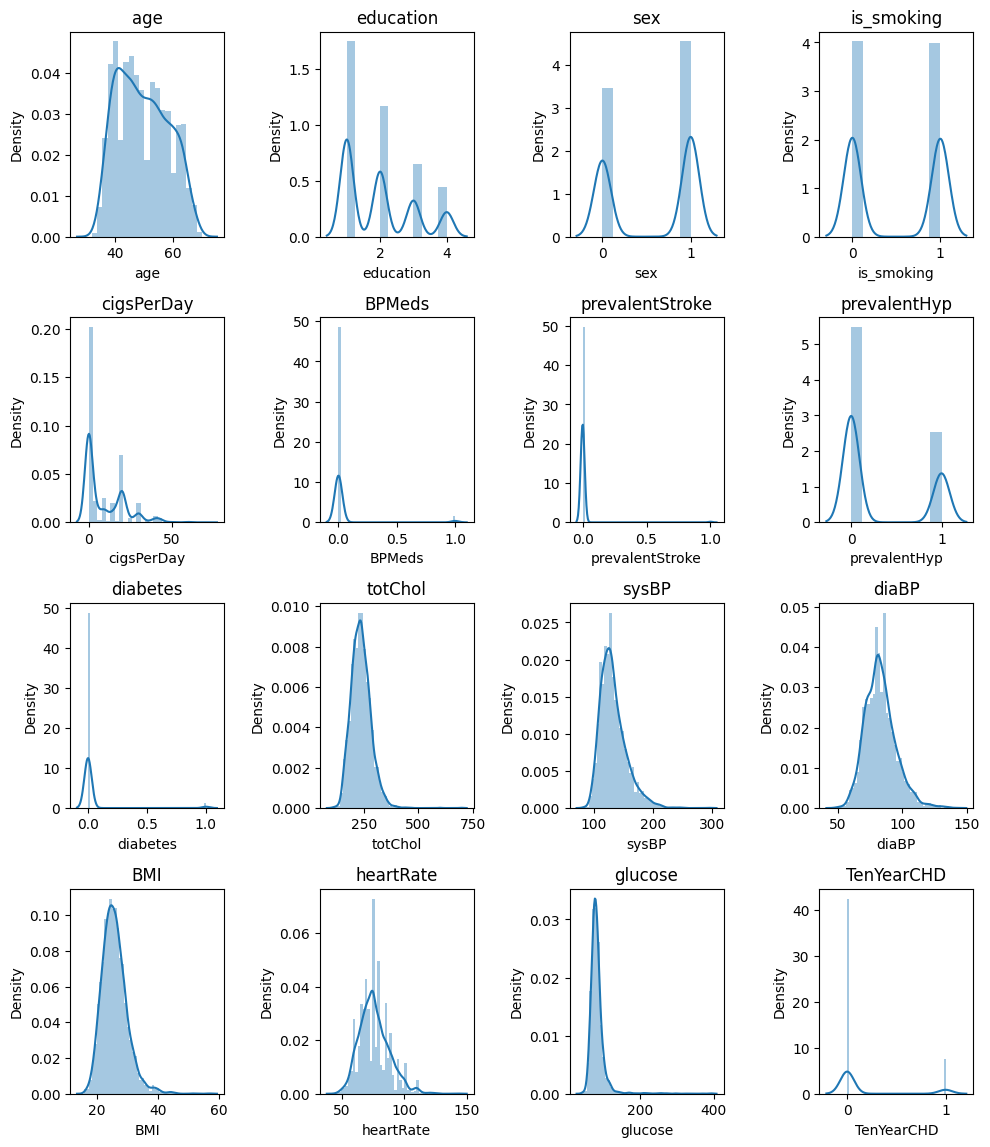

In [ ]:
# Visualizing distribution of all columns
plt.figure(figsize=(10,14))
list_ = list(df.columns)
for i, name in enumerate(list_):
  plt.subplot(5, 4, i+1)
  sns.distplot(df[name])
  plt.title(name)
  plt.tight_layout()

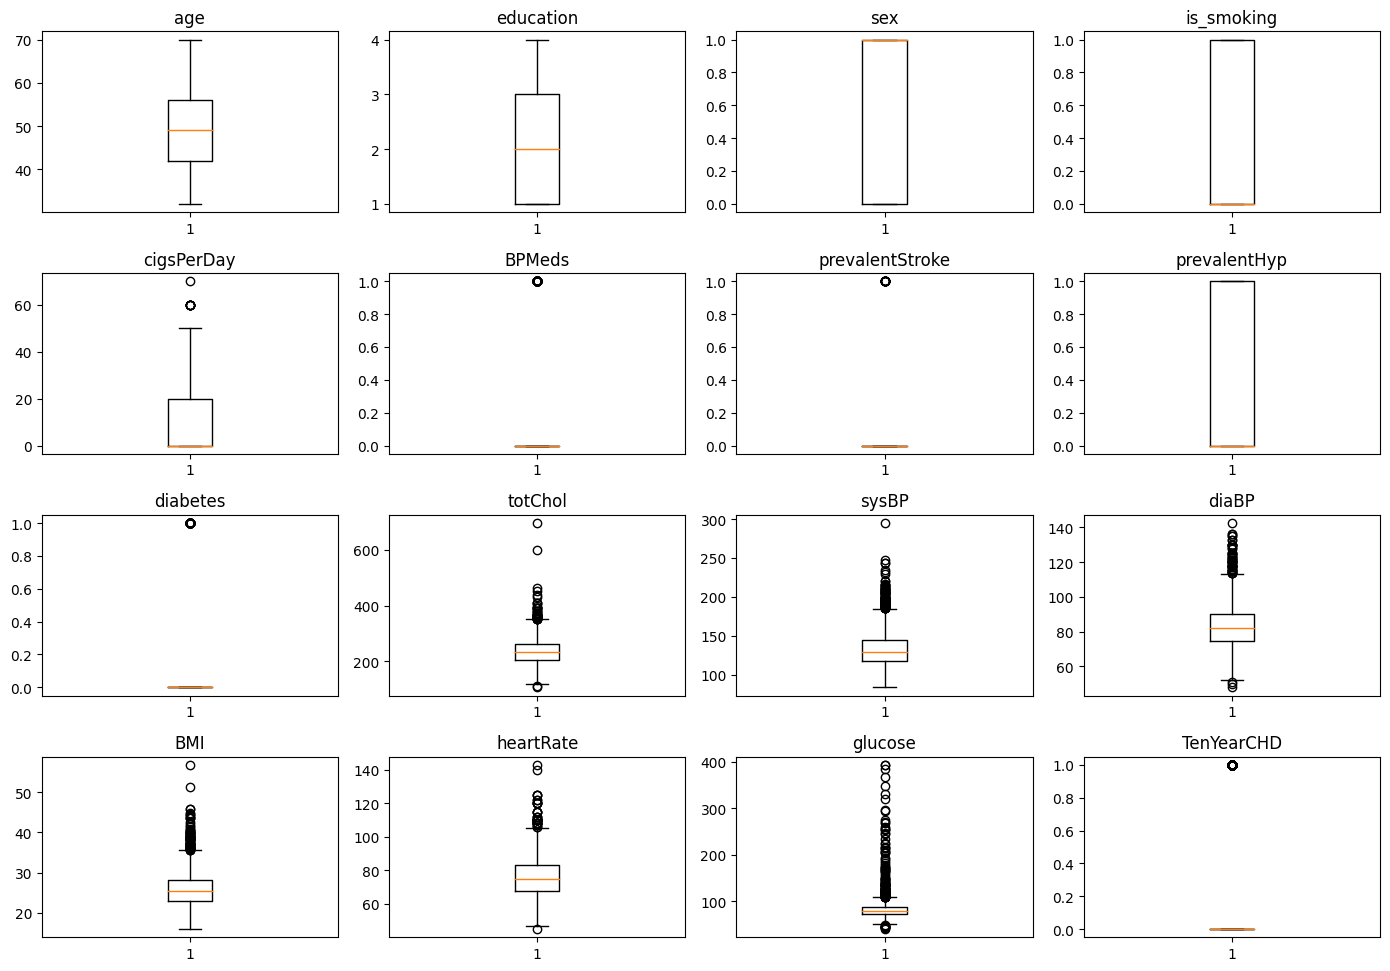

In [ ]:
# Boxplot
plt.figure(figsize=(14,12))
for i, name in enumerate(list_):
  plt.subplot(5,4, i+1)
  plt.boxplot(x = df[name])
  plt.title(name)
  plt.tight_layout()

##Univariate analysis

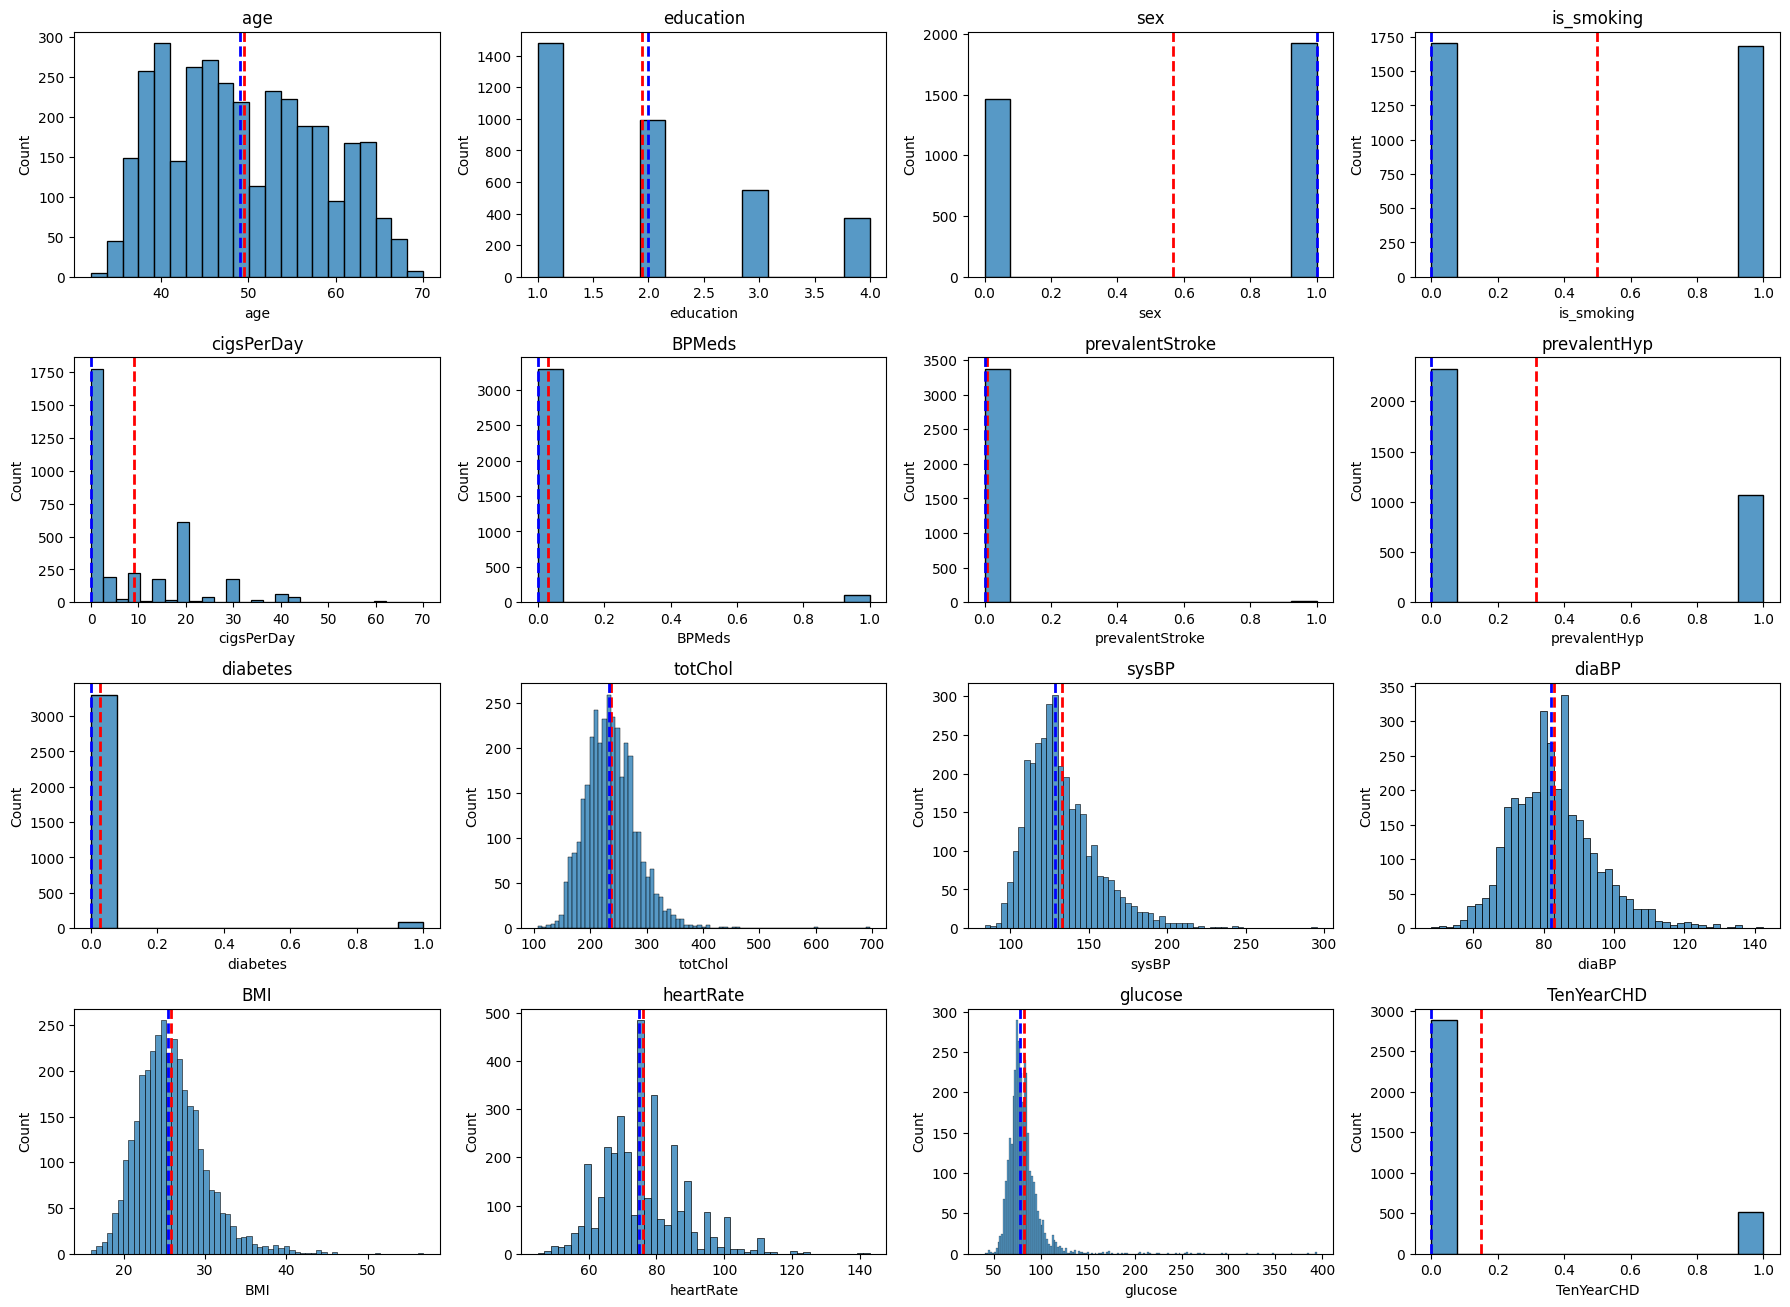

In [ ]:
plt.figure(figsize = (18,16))

for i, column in enumerate(list_):
  ax = plt.subplot(5,4,i+1)
  sns.histplot(df[column])
  plt.title(column)
  ax.axvline(df[column].mean(), color ='red', linestyle='dashed', linewidth=2)
  ax.axvline(df[column].median(), color ='blue', linestyle='dashed', linewidth=2)
  plt.tight_layout()

### Chart - 1

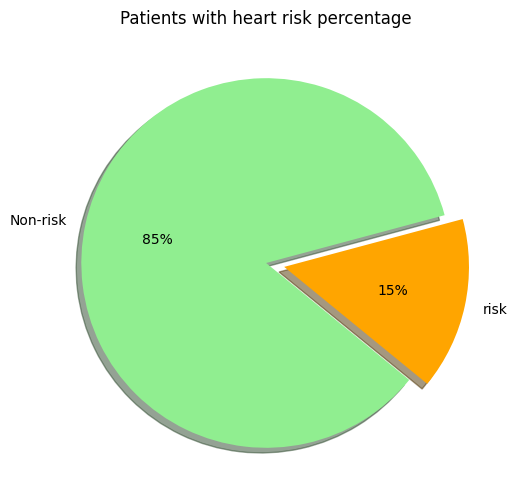

In [ ]:
# Chart - 1 visualization code
plt.figure(figsize=(10, 6))
my_colors = ['lightgreen', 'orange']
my_explode = (0, 0.1)
labels = ['Non-risk','risk']
plt.title('Patients with heart risk percentage')
plt.pie(df['TenYearCHD'].value_counts(), labels=labels, autopct='%1.0f%%', startangle=15, shadow=True, colors=my_colors, explode=my_explode)
plt.show()

##### 1. Why did you pick the specific chart?

Pie charts are useful for displaying proportions of categorical data, which will be helpful in further learning of the ML models.

##### 2. What is/are the insight(s) found from the chart?

We can observe from this chart that approximately 85% of the individuals in this dataset are not at risk of developing coronary heart disease, while approximately 15% are at risk.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, this insight is valuable for healthcare professionals in identifying patients who may require additional testing or interventions to mitigate their risk of heart disease. For instance, individuals at a higher risk may benefit from more frequent check-ups or screenings. Furthermore, lifestyle modifications such as increasing physical activity, adopting a healthy diet, and quitting smoking could be recommended.

### Chart - 2

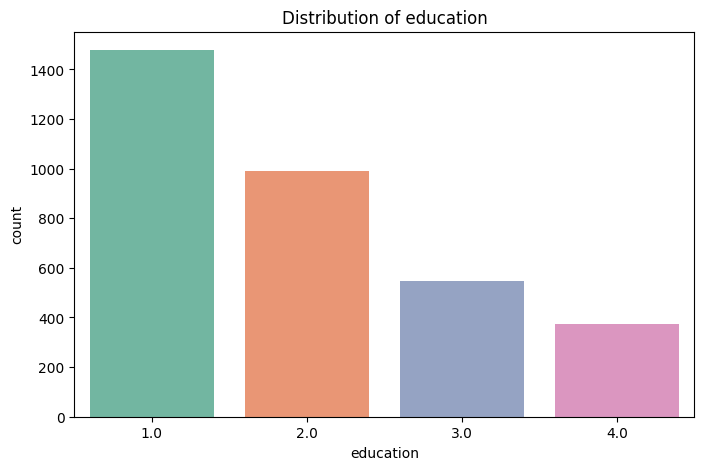

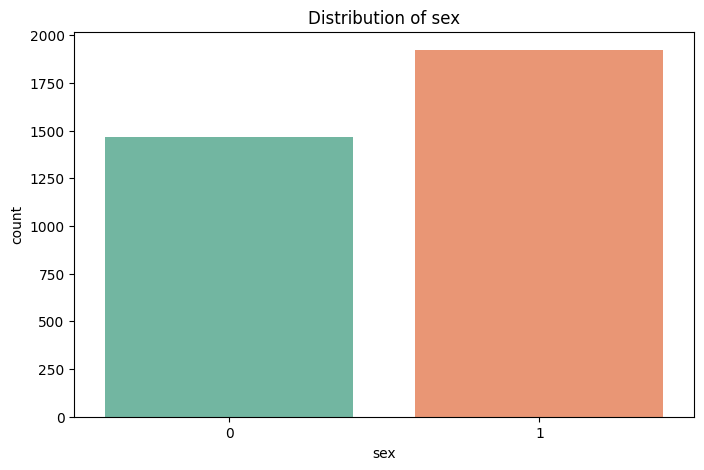

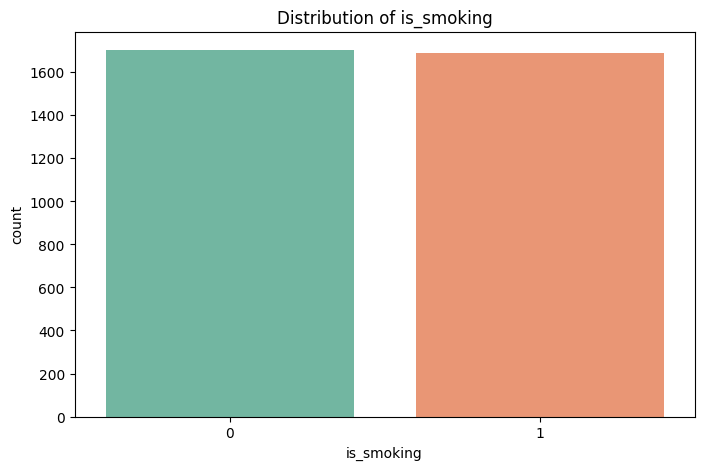

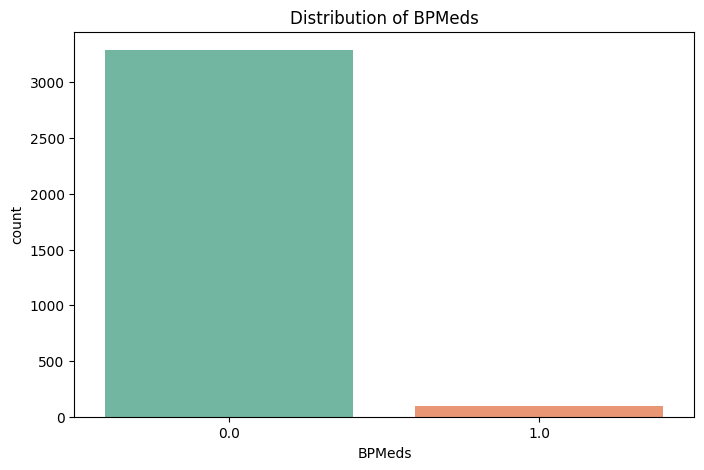

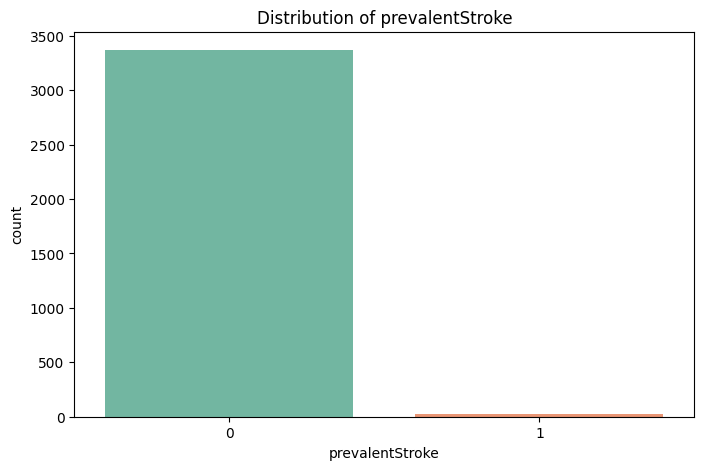

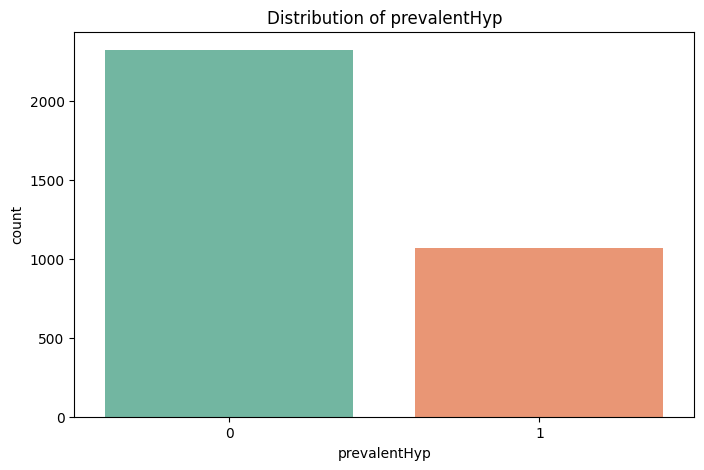

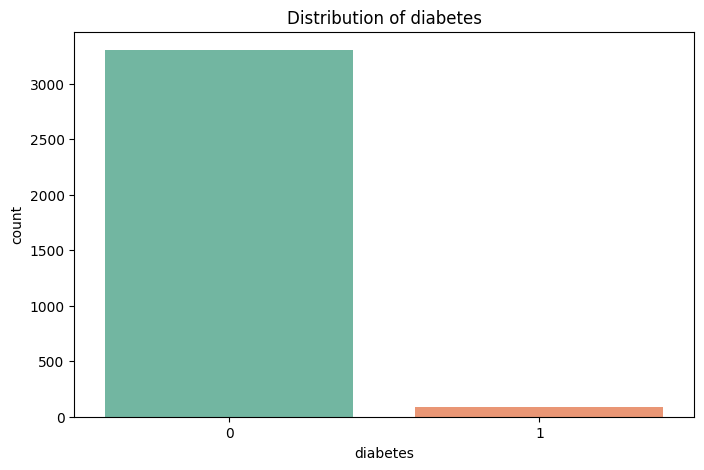

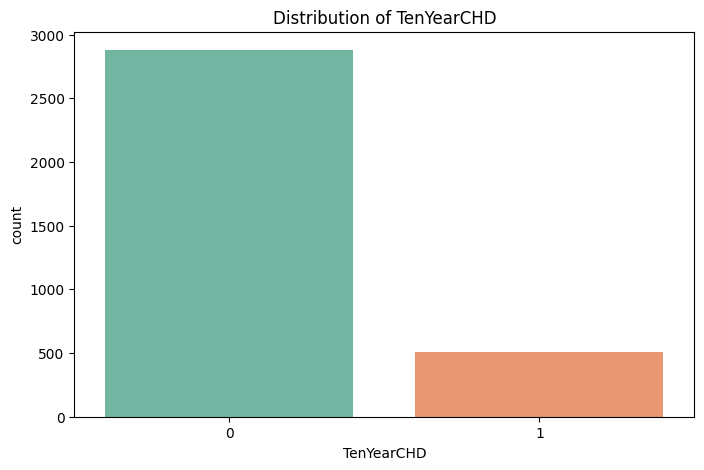

In [ ]:
# Chart - 2 visualization code

# Distribution of categorical variables
for col in categorical:
  plt.figure(figsize=(8,5))
  sns.countplot(x=col,data=df,palette='Set2')
  plt.title("Distribution of "+col)
  plt.show()

There are 7 categorical variables, each providing some insight.
* From the distribution of education, we infer that there are many people with an education qualification of 1, and fewer with a qualification of 4.
* Regarding the sex variable distribution, we observe that there are more females than males.
* Analyzing the distribution of the number of people smoking, we see an equal number of smokers and non-smokers.
* Examining the distribution of BP meds, we notice very few people taking BP medication.
* The distribution of prevalent stroke indicates that there are few people suffering from it.
* Analyzing the distribution of prevalent hypertension, we find that there is a good number of people affected, but fewer than those unaffected.
* There are very few people with diabetes.

### Chart - 3

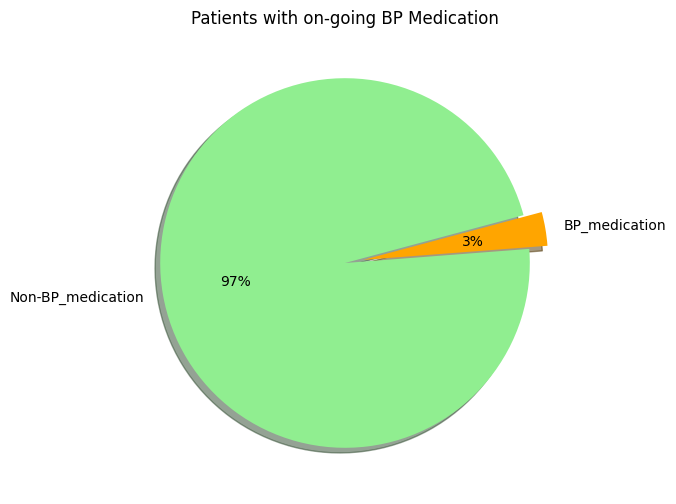

In [ ]:
# Chart - 3 visualization code
plt.figure(figsize=(10, 6))
my_colors = ['lightgreen', 'orange']
my_explode = (0, 0.1)
labels = ['Non-BP_medication', 'BP_medication']
plt.title('Patients with on-going BP Medication')
plt.pie(df['BPMeds'].value_counts(), labels=labels, autopct='%1.0f%%', startangle=15, shadow=True, colors=my_colors, explode=my_explode)
plt.show()

##### 1. Why did you pick the specific chart?

Pie chart effectively showing percentage of patients who are on BP medication.

##### 2. What is/are the insight(s) found from the chart?

Through this pie chart, we can observe that only 3% of patients are on BP medication, while the remaining 97% are not.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained can aid in tailoring marketing strategies, developing targeted healthcare services, and optimizing insurance plans to better suit the needs of the population. By understanding demographic trends and prevalent health conditions, businesses can make informed decisions that lead to more effective resource allocation and improved customer satisfaction.

### Chart - 4

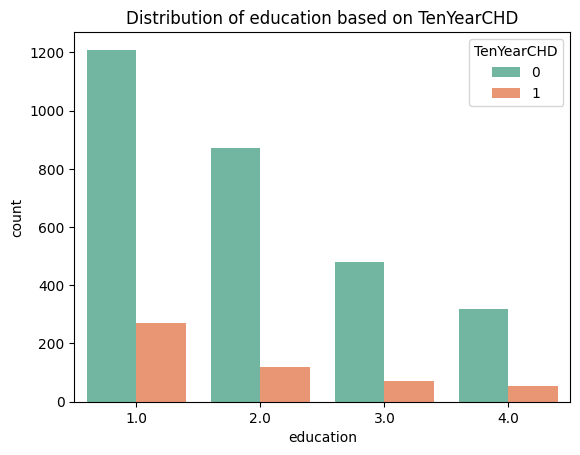

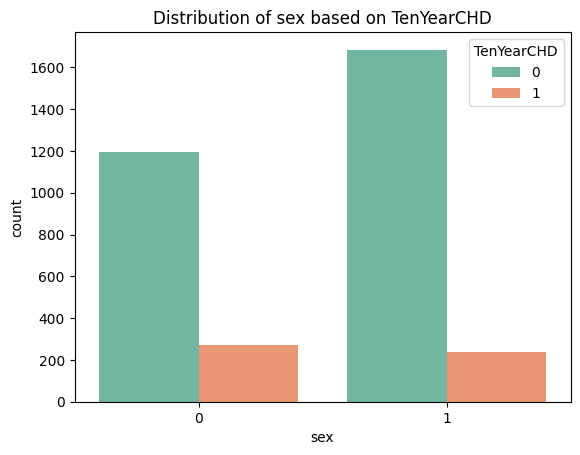

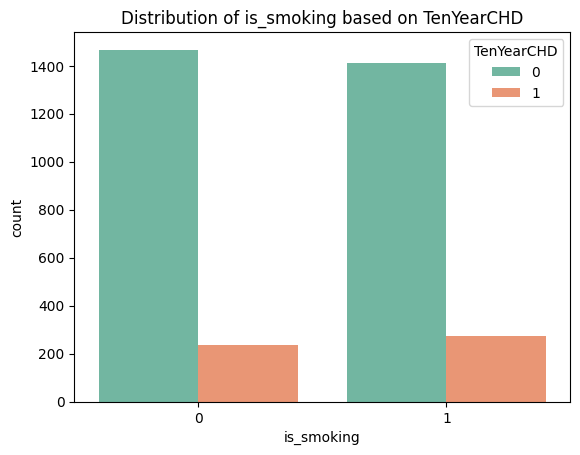

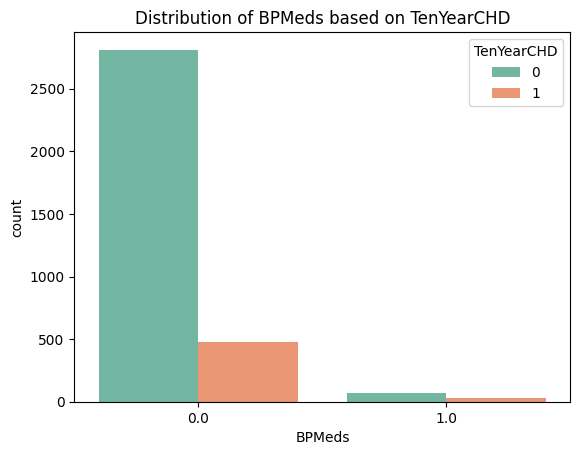

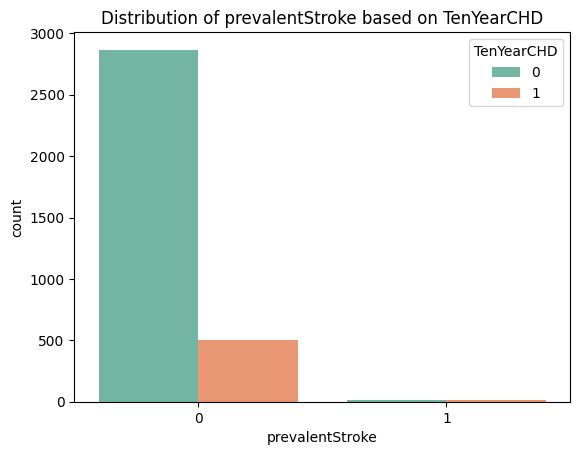

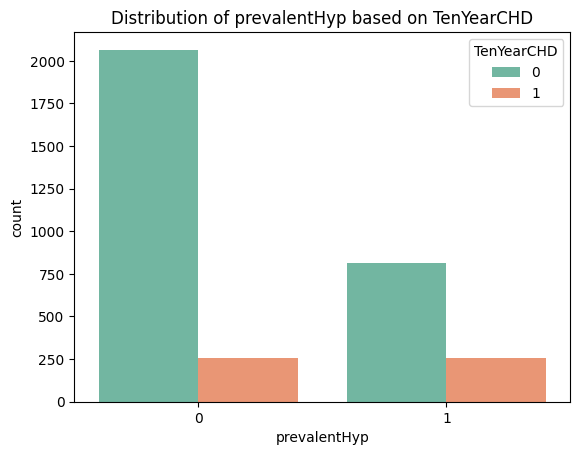

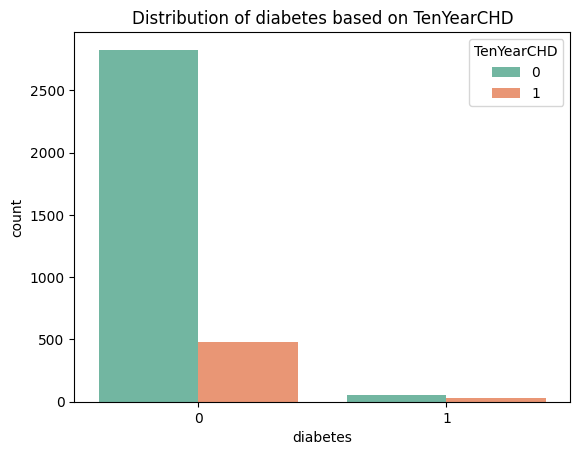

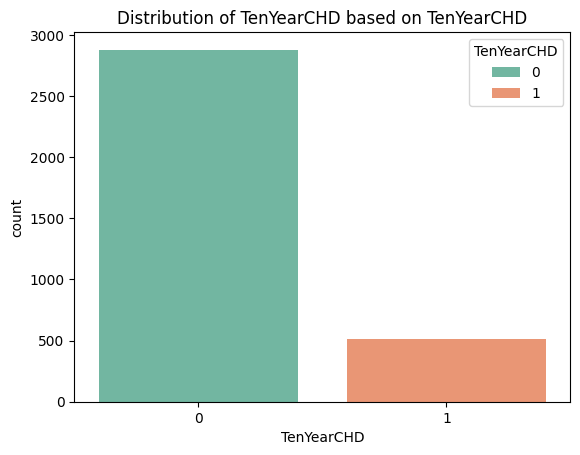

In [ ]:
# Chart - 4 visualization code

# Categorical variable vs target variable
for col in categorical:
  plt.figure()
  sns.countplot(x=col,data=df,hue=df['TenYearCHD'],palette='Set2')
  plt.title("Distribution of "+col +" based on TenYearCHD")

##### 1. Why did you pick the specific chart?

In these charts, we have conducted a bivariate analysis between categorical variables and our target variable using a bar plot to understand the behavior of our categorical variables with respect to the target variable.

##### 2. What is/are the insight(s) found from the chart?

Some insights can be gleaned from the above chart:
* Both males and females exhibit an equal number of cases of CHD, indicating that CHD is not gender-specific.
* An equal number of smokers and non-smokers are affected by CHD, suggesting that smoking may not be a direct cause of CHD.
* 50% of individuals at risk of CHD suffer from prevalent hypertension.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

These insights provide an understanding of how demographic variables such as gender, age, and education relate to CHD. By disseminating this information, we can raise awareness and promote preventive measures.

### Chart - 5

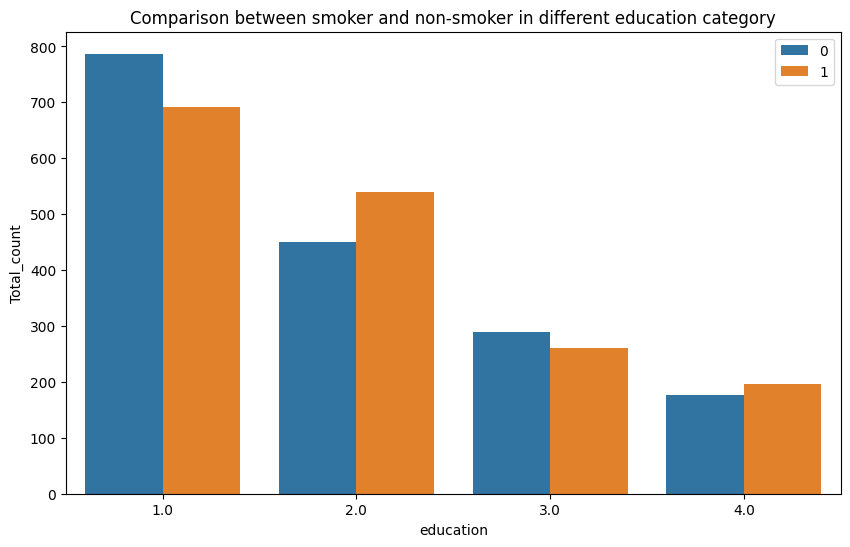

In [ ]:
# Chart - 5 visualization code
df_education_issmoking = pd.DataFrame(df.groupby(['education', 'is_smoking']) ['is_smoking'].count().reset_index(name='Total_count'))
plt.figure(figsize=(10,6))
sns.barplot(data= df_education_issmoking, x='education',y="Total_count", hue='is_smoking')
plt.title('Comparison between smoker and non-smoker in different education category')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

The bar chart is effectively showcasing the total count of smokers and non-smokers in different education qualification.

##### 2. What is/are the insight(s) found from the chart?

From this chart, it's evident that individuals with an education qualification of 1 have the highest number of both smokers and non-smokers, while those with a qualification of 4 exhibit fewer smokers and non-smokers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights obtained can inform targeted marketing strategies and product development efforts, enabling businesses to tailor offerings to specific education qualification groups based on their smoking behaviors. Additionally, understanding smoking prevalence among different education levels aids in healthcare resource allocation, allowing for more effective planning of preventive care and smoking cessation programs.

### Chart - 6

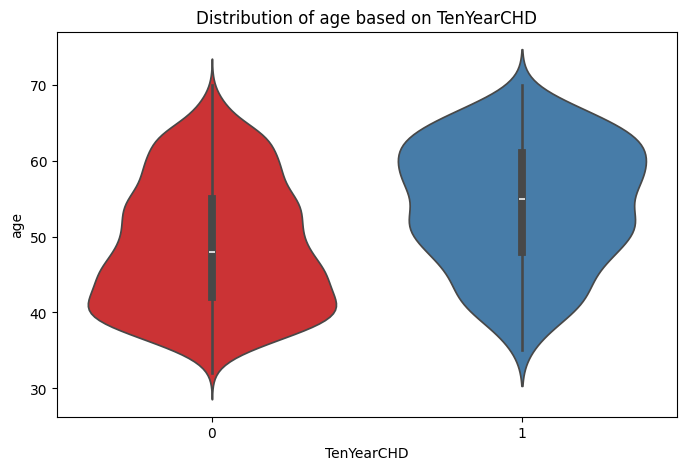

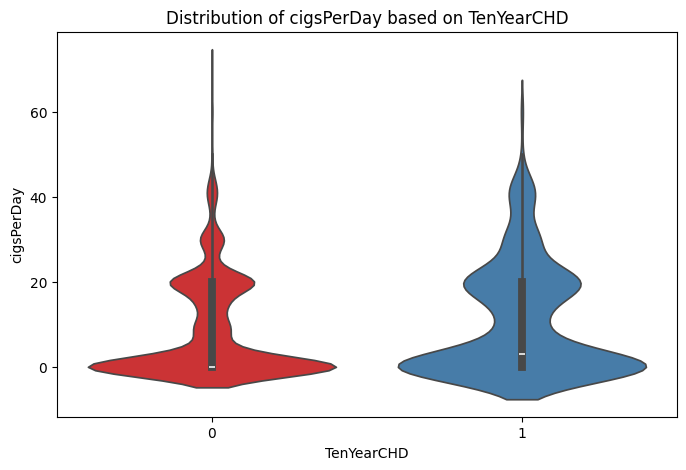

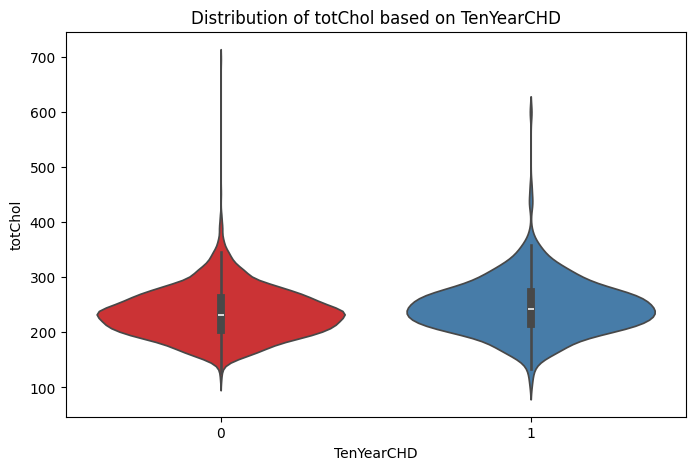

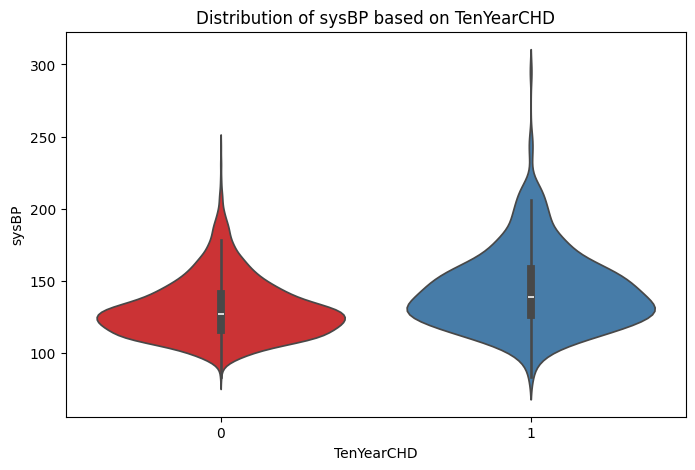

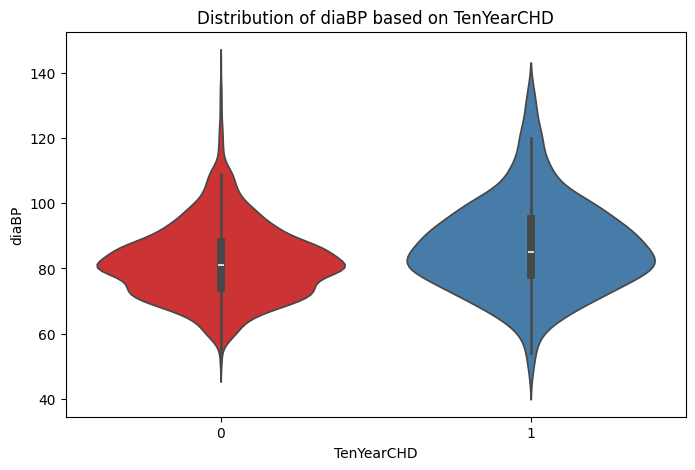

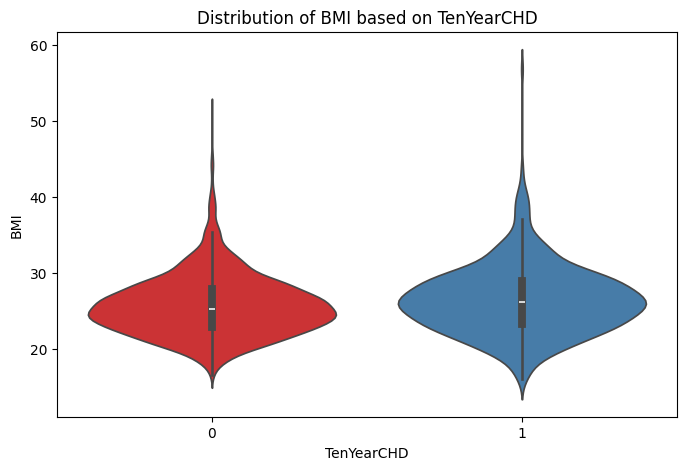

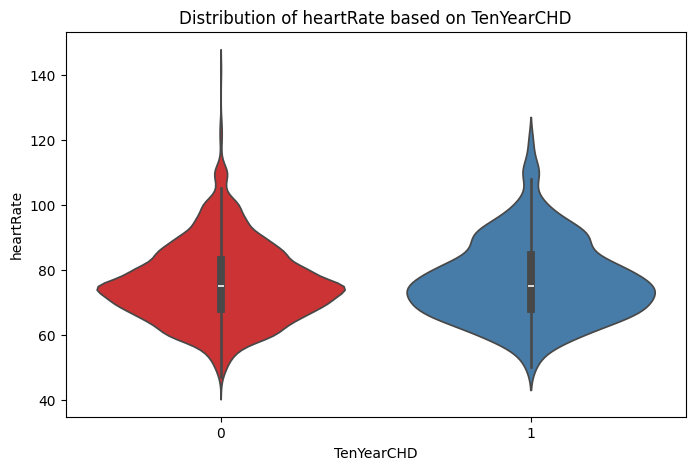

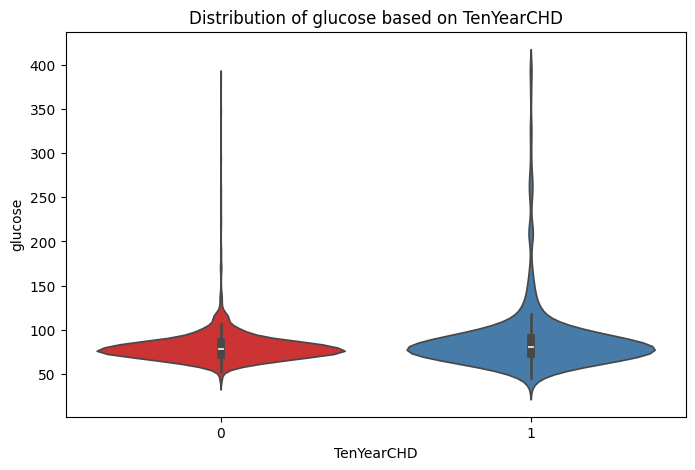

In [ ]:
# Chart - 6 visualization code

# Distribution of numerical variables based on target variable
for col in continuous:
  plt.figure(figsize=(8,5))
  sns.violinplot(x ='TenYearCHD', y = col, data = df, palette='Set1')
  plt.title("Distribution of "+col +" based on TenYearCHD")

##### 1. Why did you pick the specific chart?

Here we conduct a bivariate analysis of the target variable with respect to various numerical variables. A violin plot is chosen as the optimal method to understand the relationship between these two variables.

##### 2. What is/are the insight(s) found from the chart?

The insights derived from the above chart are as follows:
* Individuals around the age of 60 are at a higher risk of developing CHD (coronary heart disease).
* Those with cholesterol levels around 250 exhibit a higher risk of CHD.
* Individuals with systolic BP around 125 have high risk of getting CHD.
* Individuals with diastolic BP of around 80 have high risk of getting CHD.
* Individuals at high risk of CHD typically have a BMI around 25.
* Elevated glucose levels around 60 are linked to a higher risk of CHD.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights can inform targeted marketing efforts and product development aimed at individuals at higher risk of CHD. Additionally, healthcare services can be optimized by allocating resources more effectively to address the specific needs of this demographic, potentially leading to improved patient outcomes and satisfaction.

### Chart - 7

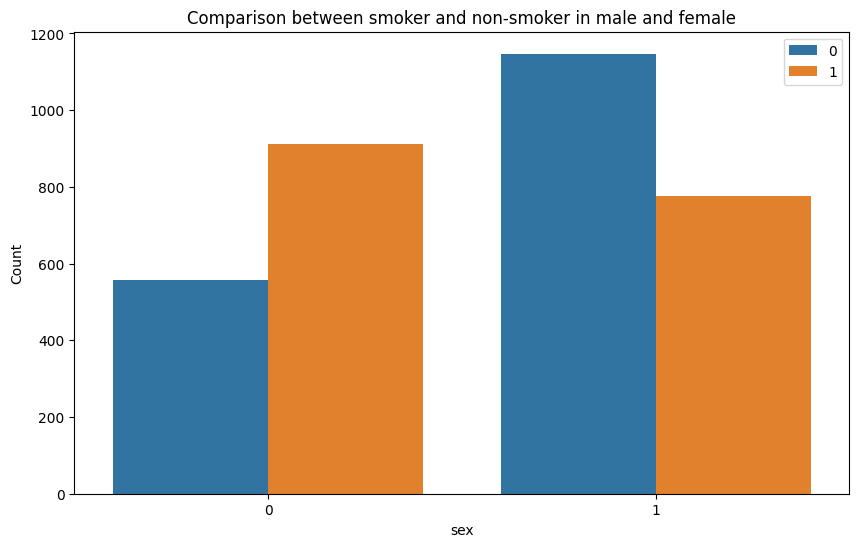

In [ ]:
# Chart - 7 visualization code
df_sex_smoke = pd.DataFrame(df.groupby(['sex', 'is_smoking'])['is_smoking'].count().reset_index(name='Count'))
plt.figure(figsize=(10,6))
sns.barplot(data= df_sex_smoke, x='sex',y="Count", hue='is_smoking')
plt.title('Comparison between smoker and non-smoker in male and female')
plt.legend()
plt.show()

##### 1. Why did you pick the specific chart?

Bar chart is clearly showing the count of smoker and non-smoker based on gender.

##### 2. What is/are the insight(s) found from the chart?

The bar chart indicates that the count of smokers is higher in males than in females.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights indicating a higher count of male smokers can inform businesses to develop targeted smoking cessation programs or products specifically tailored to the demographic with higher smoking prevalence (in this case, males). By addressing this specific audience with relevant interventions, there is potential to contribute to overall efforts to reduce smoking rates.

### Chart - 8

([<matplotlib.patches.Wedge at 0x7a0bf10ea170>,
 [Text(-1.068101662130238, -0.2629806824742519, 'No-Stroke'),
  Text(1.1652018300207316, 0.28688794906084597, 'Stroke')],
 [Text(-0.5826009066164933, -0.14344400862231918, '99%'),
  Text(0.6797010675120934, 0.16735130361882683, '1%')])

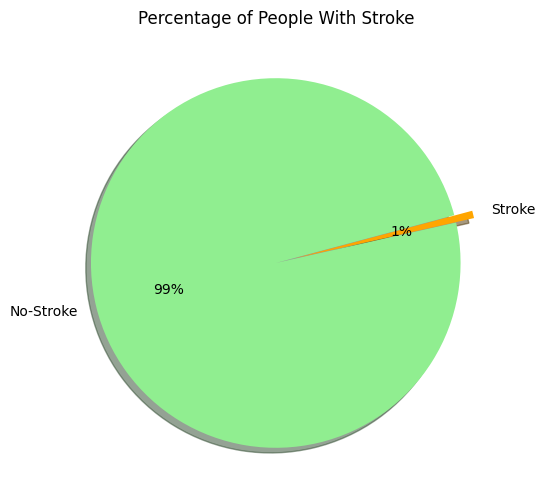

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(10,6))
my_colors = ['lightgreen','orange']
my_explode = (0,0.1)
labels = 'No-Stroke', 'Stroke'
plt.title('Percentage of People With Stroke')
plt.pie(df['prevalentStroke'].value_counts(), labels = labels, autopct='%1.0f%%', startangle =15, shadow =True, colors = my_colors, explode=my_explode)

##### 1. Why did you pick the specific chart?

Pie chart very simply shows percentages of people with stroke.

##### 2. What is/are the insight(s) found from the chart?

We can see that only 1% of people has previously had stroke.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights suggesting only 1% of people have previously had a stroke can contribute to positive business impact by informing healthcare service planning and insurance risk assessment. Businesses can tailor services and insurance plans accordingly, potentially reducing costs and improving customer satisfaction.

### Chart - 9

<Axes: >

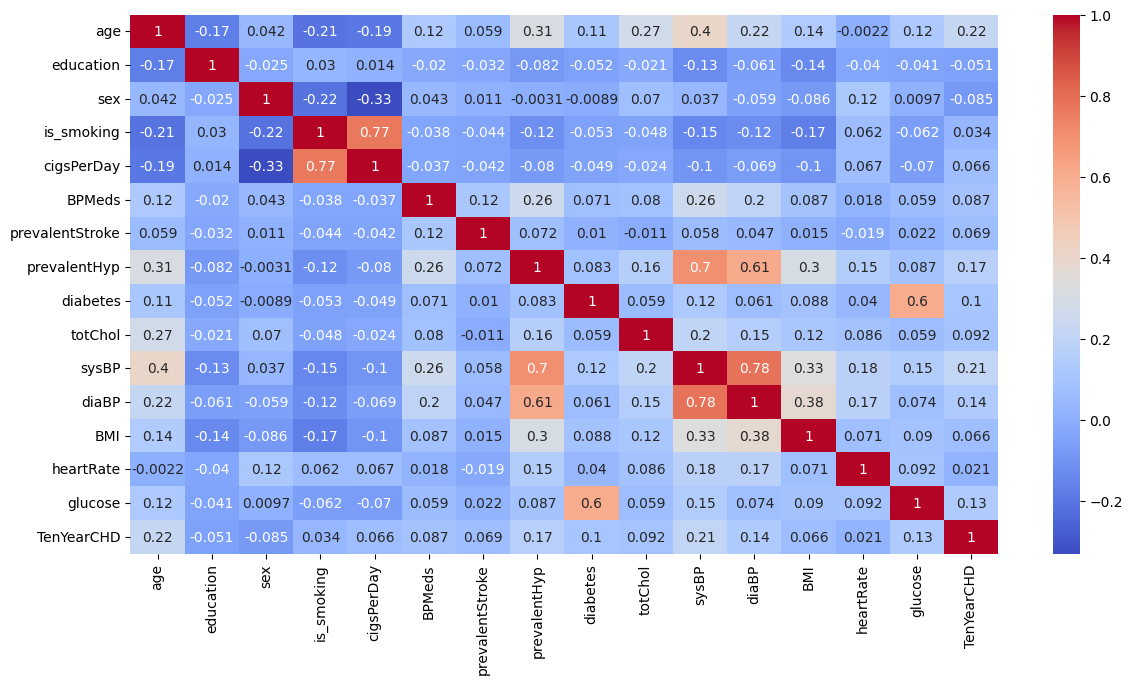

In [ ]:
# Chart - 9 visualization code
plt.figure(figsize=(14,7))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

I chose the correlation heatmap so that we can easily understand the correlation between variables.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we found that the variables 'is_smoking' and 'CigsPerDay' have a high correlation. Additionally, we observed high correlations between the variables 'sysBP' and 'DiaBP', as well as 'glucose' and 'diabetes'.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

* There is no association between gender and CHD.

(Null hypothesis) H0: There is no association between gender and CHD

(Alternative hypothesis) H1: There is association between gender and CHD

In [ ]:
# Perform statistical test to obtain P-value
cross_tab=pd.crosstab(df['sex'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")

TenYearCHD     0    1
sex                  
0           1195  272
1           1684  239
The p_value obtained is 1.060878293561798e-06


We conducted a chi-square test to obtain a p-value, which was significantly lower than our significance threshold of 0.05. Therefore, we reject the null hypothesis suggesting no association between gender and CHD.

### Hypothetical Statement - 2

* There is no association between education and CHD

(Null hypothesis) H0: There is no association between education and CHD
   
(Alternative hypothesis) H1: There is association between education and CHD

In [ ]:
# Perform statistical test to obtain P-value
cross_tab=pd.crosstab(df['education'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")

TenYearCHD     0    1
education            
1.0         1209  269
2.0          872  118
3.0          479   70
4.0          319   54
The p_value obtained is 8.69389071714776e-05


We conducted a chi-square test to obtain a p-value, which was significantly lower than our significance threshold of 0.05. Therefore, we reject the null hypothesis suggesting no association between education and CHD.

### Hypothetical Statement - 3

* There is no association between smoking and CHD.

(Null hypothesis) H0: There is no association between smoking and CHD.

(Alternative hypothesis) H1: There is association between smoking and CHD.

In [ ]:
# Perform statistical test to obtain P-value
cross_tab=pd.crosstab(df['is_smoking'],df['TenYearCHD'])
stat,p_value,dof,expected = chi2_contingency(cross_tab)
print(cross_tab)
print(f"The p_value obtained is {p_value}")

TenYearCHD     0    1
is_smoking           
0           1467  236
1           1412  275
The p_value obtained is 0.05239062274853224


We conducted a chi-square test to obtain a p-value, which was higher than our significance threshold of 0.05. Therefore, we failed to reject the null hypothesis suggesting no association between smoking and CHD.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Check null values
df.isnull().sum()

age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

#### We already handled missing values previously, so we don't have to do anything here.

### 2. Feature Selection

<Axes: >

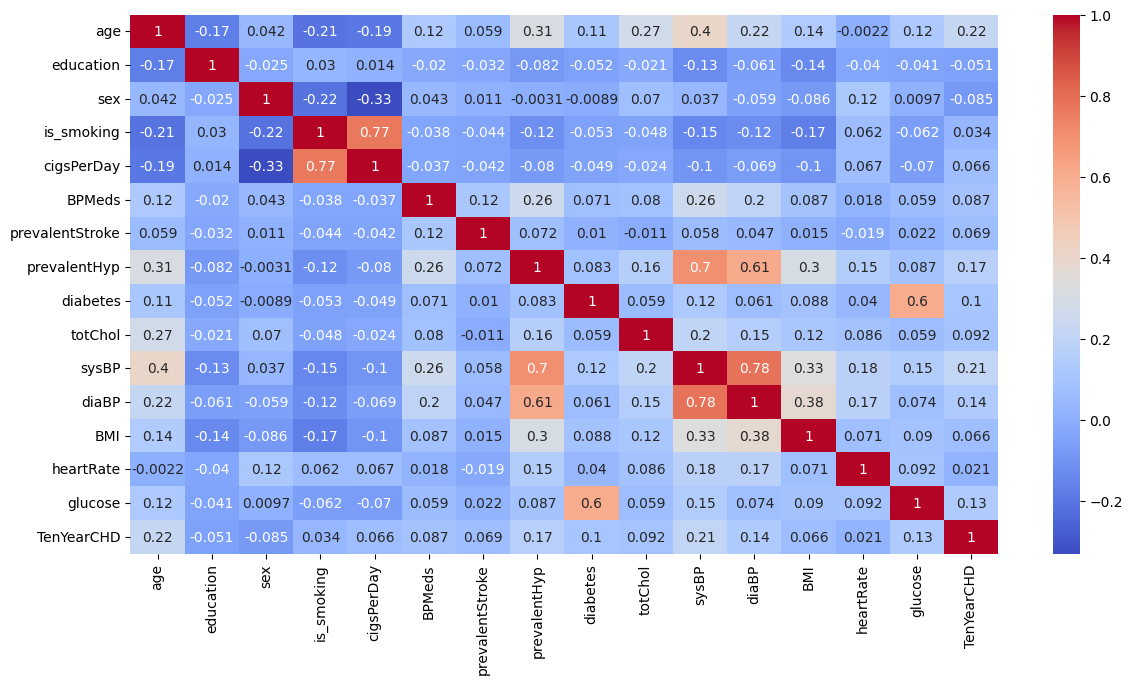

In [ ]:
# Correlation plot
plt.figure(figsize=(14,7))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#### We can see that cigsPerDay and is_smoking are correlated, so we will remove is_smoking because both mean the same thing. Also, sysBp and Diabp are correlated, so we will remove these features and add new feature pulse_pressure to describe the working of these two features. This is done to avoid overfitting.

In [ ]:
df['pulse_pressure'] = (df['sysBP'] - df['diaBP'])

In [ ]:
df.drop(["is_smoking","sysBP","diaBP"], axis = 1 ,inplace=True)

In [ ]:
df.columns

Index(['age', 'education', 'sex', 'cigsPerDay', 'BPMeds', 'prevalentStroke',
       'prevalentHyp', 'diabetes', 'totChol', 'BMI', 'heartRate', 'glucose',
       'TenYearCHD', 'pulse_pressure'],
      dtype='object')

### 3. Handling Outliers

In [ ]:
numerical = [x for x in df.columns if df[x].nunique()> 5]
print(numerical)

['age', 'cigsPerDay', 'totChol', 'BMI', 'heartRate', 'glucose', 'pulse_pressure']


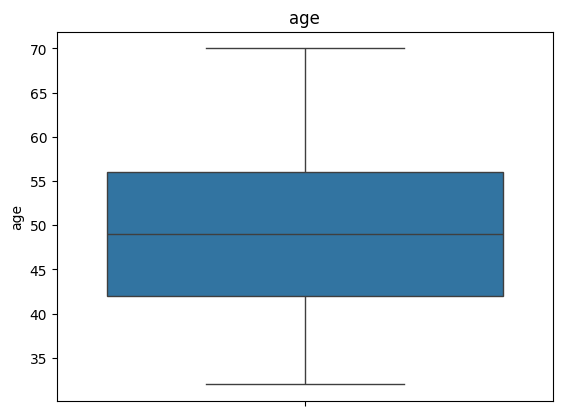

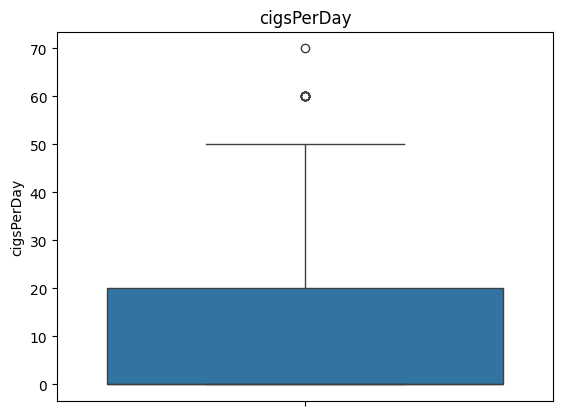

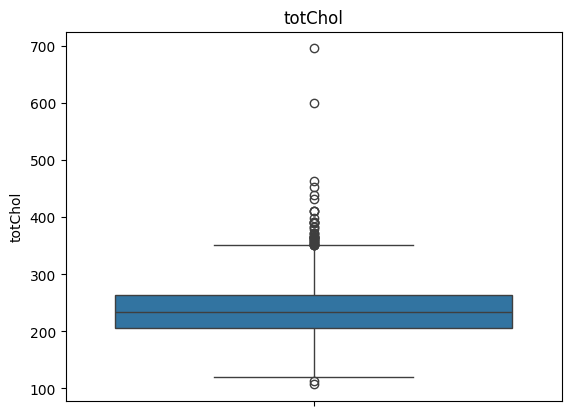

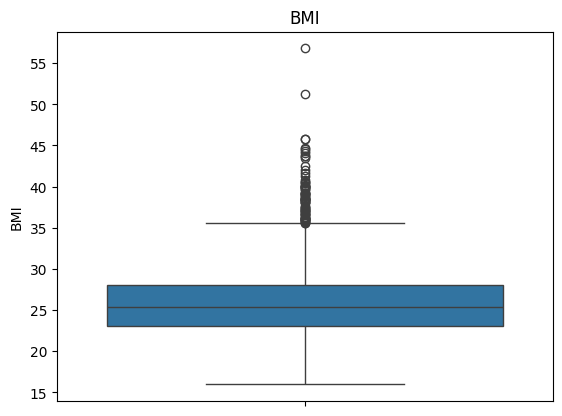

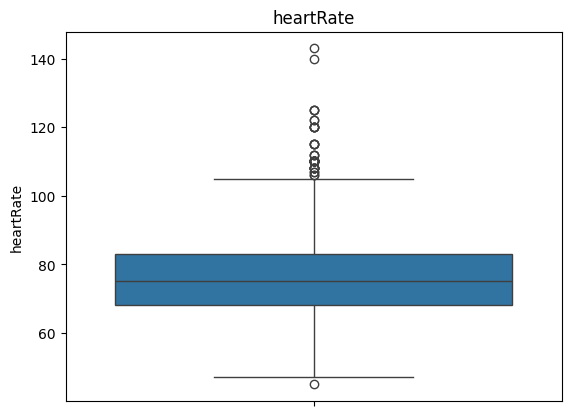

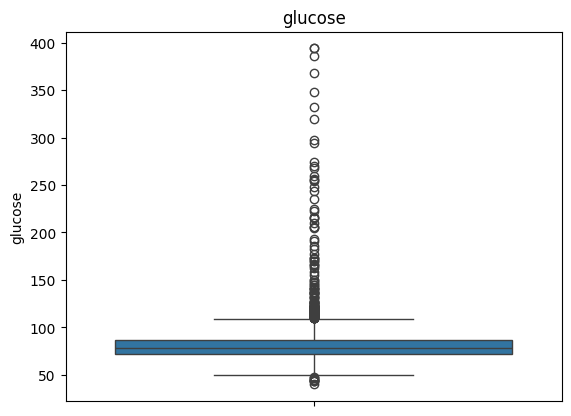

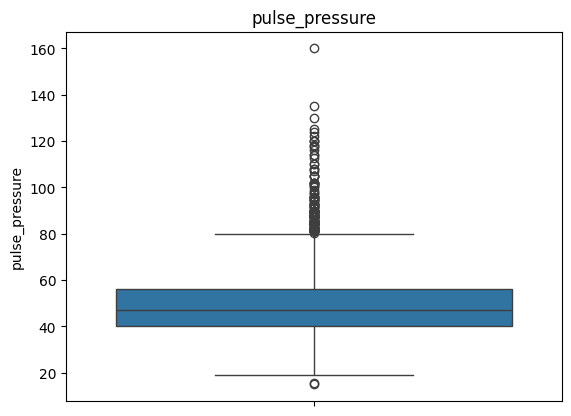

In [ ]:
# Before outliers treatment
for col in numerical:
  plt.figure()
  sns.boxplot(df[col])
  plt.title(col)

In [ ]:
# Applying IQR to treat outliers
for i in numerical:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3-q1

  df[i] = np.where(df[i] < ( q1 - 1.5*iqr ),( q1-1.5*iqr ), np.where( df[i] > ( q3 + 1.5*iqr ),( q3+1.5*iqr ), df[i]))

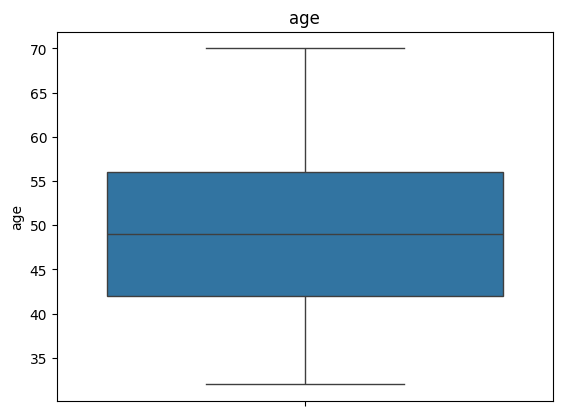

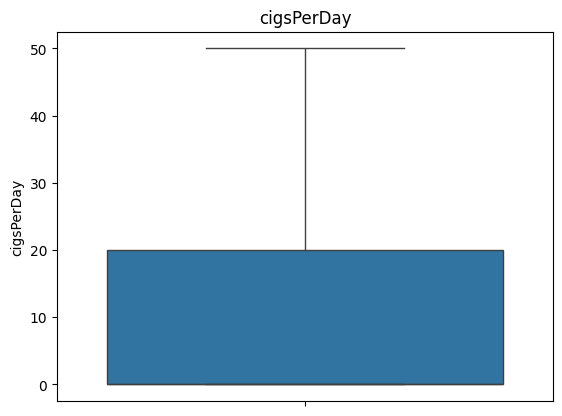

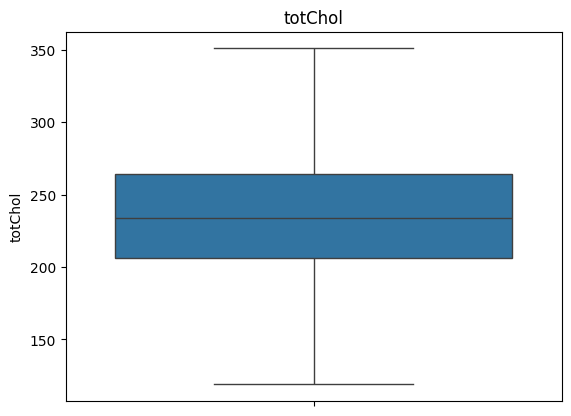

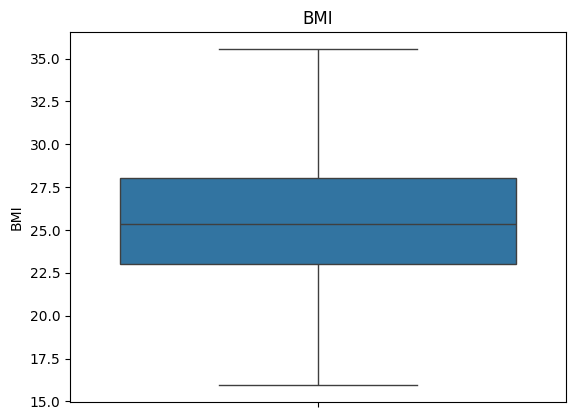

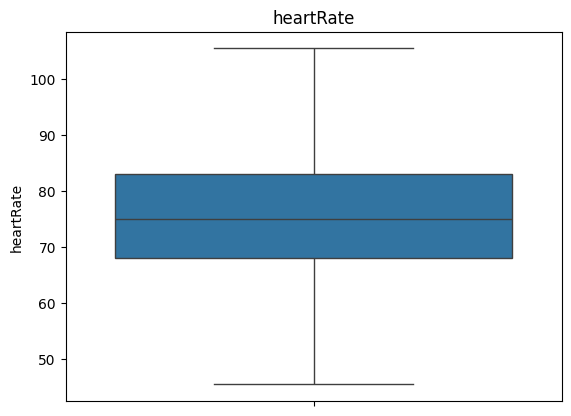

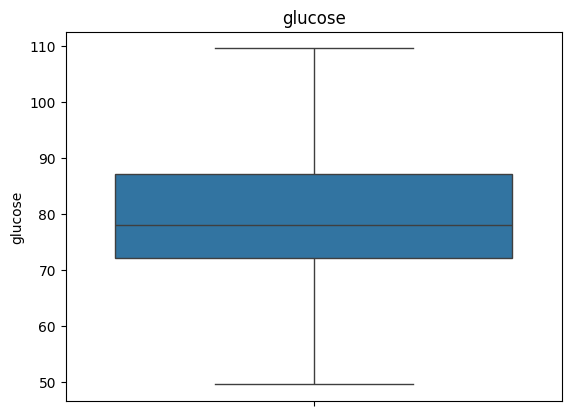

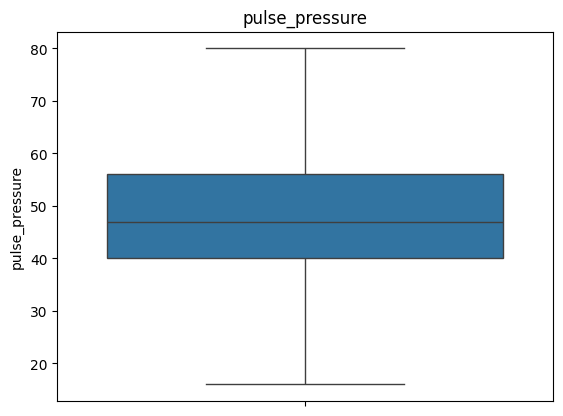

In [ ]:
# After outliers treatment
for col in numerical:
  plt.figure()
  sns.boxplot(df[col])
  plt.title(col)

#### We have used the IQR method for outlier treatment, where values higher than the upper limit are replaced with the upper limit, and similarly, values lower than the lower limit are replaced with the lower limit.

### 4. Data Splitting

In [ ]:
x=df.drop('TenYearCHD',axis=1)
y=df['TenYearCHD']

In [ ]:
y=y.astype('int')

In [ ]:
# Splitting data into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0, stratify = y, shuffle=True)

In [ ]:
y_train.value_counts()

TenYearCHD
0    2303
1     409
Name: count, dtype: int64

In [ ]:
y_test.value_counts()

TenYearCHD
0    576
1    102
Name: count, dtype: int64

### 5. Handling Imbalanced Dataset

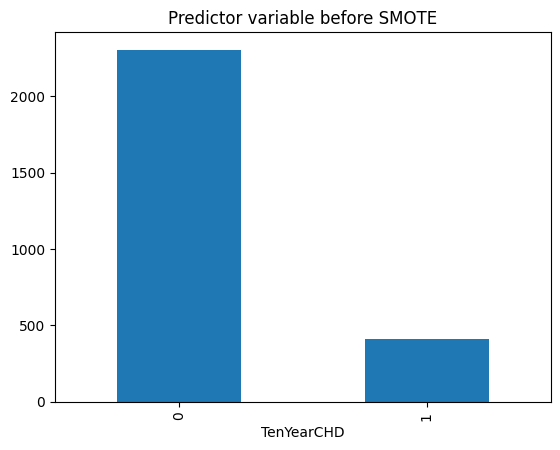

In [ ]:
# Before handling imbalanced data
y_train.value_counts().plot.bar(title='Predictor variable before SMOTE')
plt.show()

In [ ]:
# Handling Imbalanced Dataset (If needed)
smt = SMOTETomek(random_state=0)
x_res_tr, y_res_tr = smt.fit_resample(x_train, y_train)

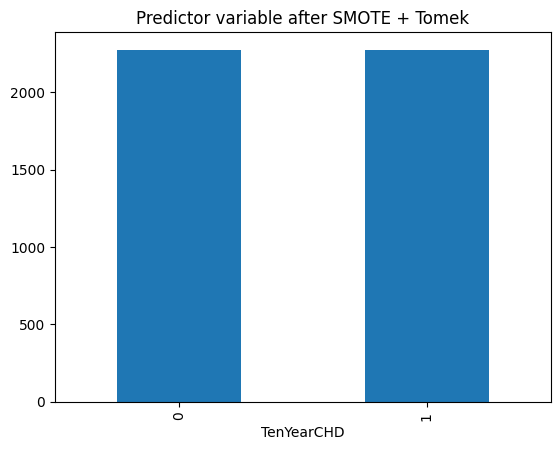

In [ ]:
y_res_tr.value_counts().plot.bar(title='Predictor variable after SMOTE + Tomek')
plt.show()

In [ ]:
print("The shape of resampled train data is",x_res_tr.shape)

The shape of resampled train data is (4548, 13)


### 6. Data Scaling

In [ ]:
scaler=StandardScaler()

# transforming train data
x_res_scaled_tr=scaler.fit_transform(x_res_tr)

# transforming test data
x_scaled_tst=scaler.fit_transform(x_test)

## 7. ***ML Model Implementation***

In [ ]:
# ML model function to calculate scores
def model_scores(model,x_train,x_test,y_train,y_test):
  model.fit(x_train,y_train) # fitting the model

  y_pred_tr=model.predict(x_train) # predicted train labels
  y_pred_tst=model.predict(x_test) # predicted test labels

  try:
    y_prob_tr=model.predict_proba(x_train)[:,1] # probability values for train
    y_prob_tst=model.predict_proba(x_test)[:,1] # probability values for test
  except:
    pass

  # Calculating roc_auc scores
  roc_auc_tr=roc_auc_score(y_train,y_prob_tr)
  roc_auc_tst=roc_auc_score(y_test,y_prob_tst)
  print(" ROC-AUC score for train data is", roc_auc_tr)
  print(" ROC-AUC score for test data is",roc_auc_tst)

  # Plotting roc_auc curve
  fpr_tr,tpr_tr,thresholds_tr=roc_curve(y_train,y_prob_tr)   # roc_curve for train
  fpr_tst,tpr_tst,thresholds_tst=roc_curve(y_test,y_prob_tst) # roc_curve for test
  plt.plot(fpr_tr,tpr_tr,label='roc_auc curve for train')
  plt.plot(fpr_tst,tpr_tst,label='roc_curve for test')
  plt.xlabel("FPR")
  plt.ylabel("TPR")
  plt.legend()
  plt.show()

  # Plotting confusion matrix for train and test data.
  cm_train=confusion_matrix(y_train,y_pred_tr)
  cm_test=confusion_matrix(y_test,y_pred_tst)

  fig,ax=plt.subplots(1,2,figsize=(10,5))

  # Confusion matrix for train data
  sns.heatmap(cm_train,annot=True,xticklabels=['False','True'],yticklabels=['False','True'],ax=ax[0],fmt='.0f')
  ax[0].set_xlabel("Predicted labels")
  ax[0].set_ylabel("True labels")
  ax[0].set_title("Confusion matrix for Train Data")

  # Confusion matrix for test data
  sns.heatmap(cm_test,annot=True,xticklabels=['False','True'],yticklabels=['False','True'],ax=ax[1],fmt='.0f')
  ax[1].set_xlabel("Predicted labels")
  ax[1].set_ylabel("True labels")
  ax[1].set_title("Confusion matrix for Test Data")
  plt.show()

  # Classification report
  target_names=[0,1]
  clr_tr=classification_report(y_train,y_pred_tr,target_names=target_names,output_dict=True)
  clr_tst=classification_report(y_test,y_pred_tst,target_names=target_names,output_dict=True)
  clr_tr_df=pd.DataFrame(clr_tr).T
  clr_tst_df=pd.DataFrame(clr_tst).T
  print("\n\nThe classification report for train data is:\n\n",clr_tr_df)
  print("\n\nThe classification report for test data is:\n\n",clr_tst_df)

  # Calculating all scores and storing it in a list
  precision_train=clr_tr['macro avg']['precision']
  precision_tst=clr_tst['macro avg']['precision']

  recall_tr=clr_tr[1]['recall']
  recall_tst=clr_tst[1]['recall']

  acc_tr=accuracy_score(y_train,y_pred_tr)
  acc_tst=accuracy_score(y_test,y_pred_tst)

  f1_tr=clr_tr['macro avg']['f1-score']
  f1_tst=clr_tst['macro avg']['f1-score']

  model_metric=[precision_train,precision_tst,recall_tr,recall_tst,roc_auc_tr,roc_auc_tst,acc_tr,acc_tst,f1_tr,f1_tst]

  return model_metric

In [ ]:
# Plotting feature importance

def feature_importances(model,names,model_name):
  importances=np.array(model.feature_importances_)
  feature_names=np.array(names)
  data={'feature_names':feature_names,'feature_importances':importances}
  fi_df=pd.DataFrame(data)
  fi_df.sort_values(by=['feature_importances'],ascending=False,inplace=True)
  sns.barplot(y=fi_df['feature_names'],x=fi_df['feature_importances'])
  plt.title(model_name + ' feature importance')
  plt.xlabel("Feature importances")
  plt.ylabel("Feature names")

# 1. Logistic Regression

In [ ]:
# ML Model - 1 Implementation
log_reg=LogisticRegression(fit_intercept=True,max_iter=10000)

In [ ]:
# Defining dataframe to store ml models performance metrics
model_df=pd.DataFrame(index=['precision_train','precision_test','recall_train','recall_test','roc_auc_train','roc_auc_test','accuracy_train','accuracy_test','f1_train','f1_test'])

 ROC-AUC score for train data is 0.774545375082478
 ROC-AUC score for test data is 0.7068014705882354


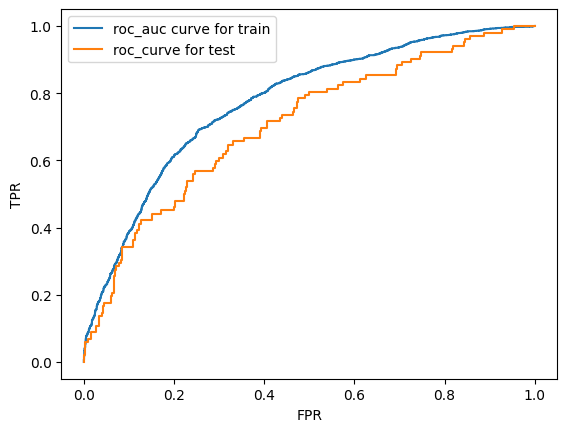

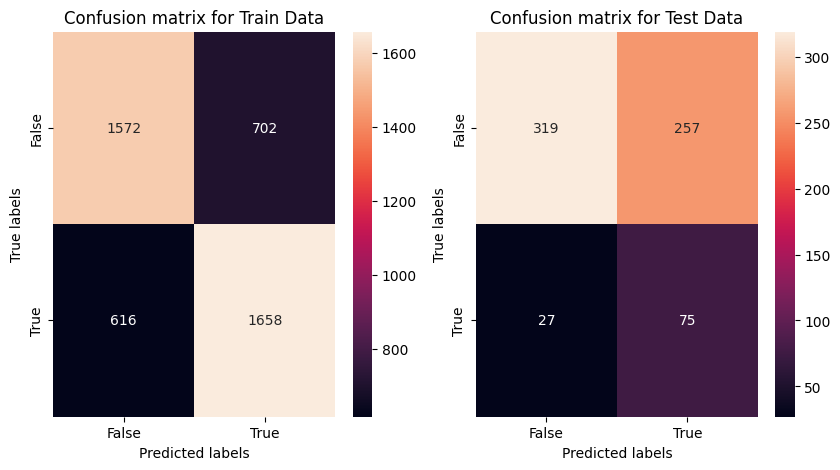



The classification report for train data is:

               precision    recall  f1-score      support
0              0.718464  0.691293  0.704617  2274.000000
1              0.702542  0.729112  0.715580  2274.000000
accuracy       0.710202  0.710202  0.710202     0.710202
macro avg      0.710503  0.710202  0.710099  4548.000000
weighted avg   0.710503  0.710202  0.710099  4548.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.921965  0.553819  0.691974  576.000000
1              0.225904  0.735294  0.345622  102.000000
accuracy       0.581121  0.581121  0.581121    0.581121
macro avg      0.573934  0.644557  0.518798  678.000000
weighted avg   0.817248  0.581121  0.639868  678.000000


In [ ]:
# Visualizing evaluation metric score chart
log_scores=model_scores(log_reg,x_res_scaled_tr,x_scaled_tst,y_res_tr,y_test)

In [ ]:
model_df['Logistic Regression']=log_scores
model_df

,Logistic Regression
precision_train,0.710503
precision_test,0.573934
recall_train,0.729112
recall_test,0.735294
roc_auc_train,0.774545
roc_auc_test,0.706801
accuracy_train,0.710202
accuracy_test,0.581121
f1_train,0.710099
f1_test,0.518798


##### We will focus on the recall scores as it is the best metric for our problem. For logistic regression, the recall test score is 0.73. The model seems to perform well. Let's perform cross-validation and hyperparameter tuning to see if it further increases or not.

#### Cross-Validation & Hyperparameter Tuning for Logistic Regression

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques

from sklearn.model_selection import StratifiedKFold
param_grid={'C':[100,10,1,0.1,0.01,0.001,0.0001]}
log_reg=LogisticRegression(fit_intercept=True,max_iter=10000)
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
log_grid=GridSearchCV(log_reg,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
log_grid.fit(x_res_scaled_tr,y_res_tr)
print(log_grid.best_params_)
log_optimal=log_grid.best_estimator_

{'C': 0.001}


 ROC-AUC score for train data is 0.7709848008422232
 ROC-AUC score for test data is 0.7074993191721133


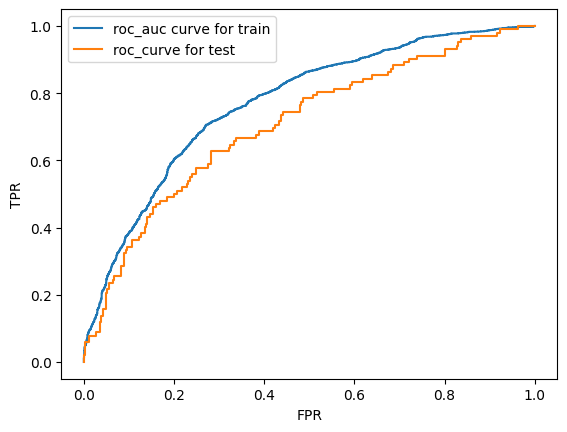

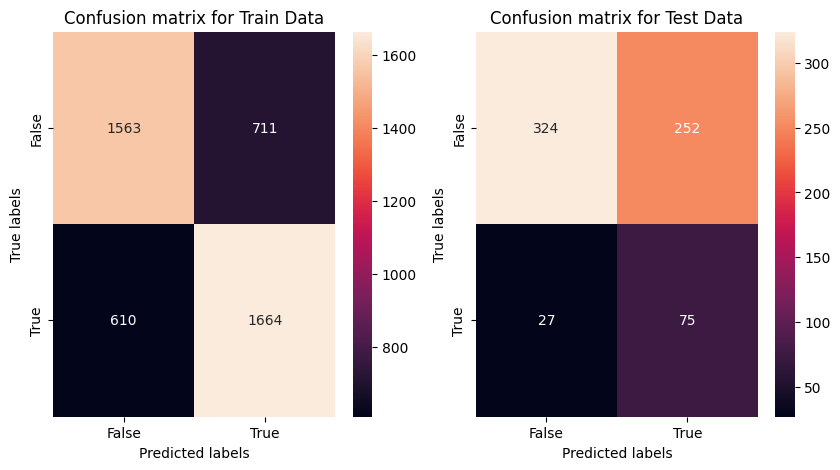



The classification report for train data is:

               precision    recall  f1-score      support
0              0.719282  0.687335  0.702946  2274.000000
1              0.700632  0.731750  0.715853  2274.000000
accuracy       0.709543  0.709543  0.709543     0.709543
macro avg      0.709957  0.709543  0.709399  4548.000000
weighted avg   0.709957  0.709543  0.709399  4548.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.923077  0.562500  0.699029  576.000000
1              0.229358  0.735294  0.349650  102.000000
accuracy       0.588496  0.588496  0.588496    0.588496
macro avg      0.576217  0.648897  0.524340  678.000000
weighted avg   0.818712  0.588496  0.646468  678.000000


In [ ]:
# Visualizing metric scores
log_reg_tuned=model_scores(log_optimal,x_res_scaled_tr,x_scaled_tst,y_res_tr,y_test)

In [ ]:
# Evaluation metric score chart
model_df['Logistic Regression tuned']=log_reg_tuned
model_df

,Logistic Regression,Logistic Regression tuned
precision_train,0.710503,0.709957
precision_test,0.573934,0.576217
recall_train,0.729112,0.731750
recall_test,0.735294,0.735294
roc_auc_train,0.774545,0.770985
roc_auc_test,0.706801,0.707499
accuracy_train,0.710202,0.709543
accuracy_test,0.581121,0.588496
f1_train,0.710099,0.709399
f1_test,0.518798,0.524340


####From the evaluation metric score chart we found no significant improvement in the performance of the model.

## 2. KNN (K-Nearest Neighbor)

In [ ]:
# ML Model - 2 Implementation
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()

 ROC-AUC score for train data is 0.9760064443067555
 ROC-AUC score for test data is 0.6122514978213508


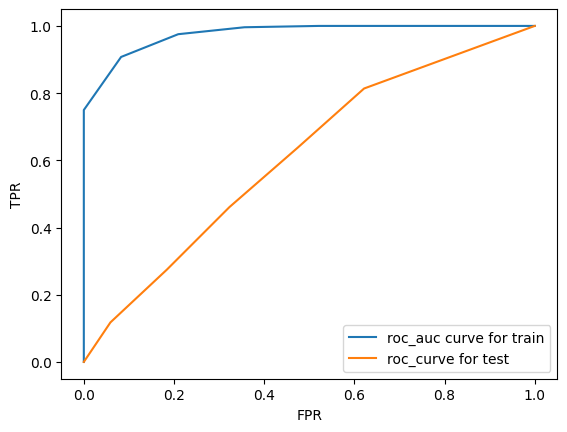

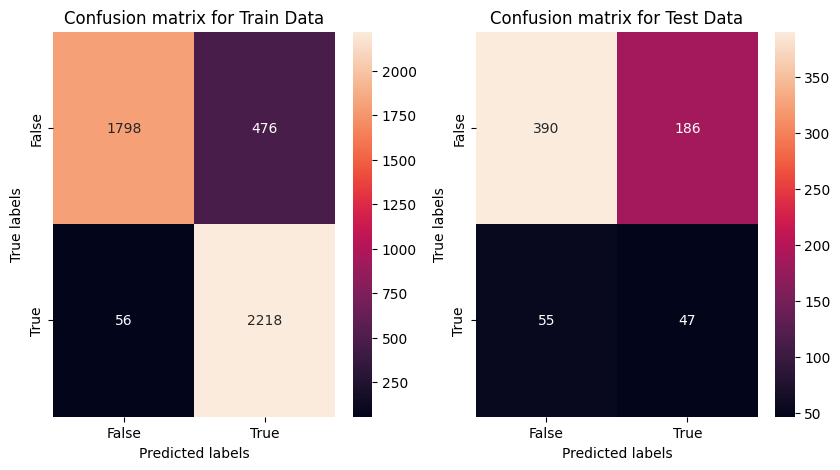



The classification report for train data is:

               precision    recall  f1-score      support
0              0.969795  0.790677  0.871124  2274.000000
1              0.823311  0.975374  0.892915  2274.000000
accuracy       0.883026  0.883026  0.883026     0.883026
macro avg      0.896553  0.883026  0.882019  4548.000000
weighted avg   0.896553  0.883026  0.882019  4548.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.876404  0.677083  0.763957  576.000000
1              0.201717  0.460784  0.280597  102.000000
accuracy       0.644543  0.644543  0.644543    0.644543
macro avg      0.539061  0.568934  0.522277  678.000000
weighted avg   0.774903  0.644543  0.691239  678.000000


In [ ]:
# Visualizing evaluation metric score chart
knn_scores=model_scores(knn,x_res_scaled_tr,x_scaled_tst,y_res_tr,y_test)

In [ ]:
# Evaluation metric score chart
model_df['KNearestNeighbors']=knn_scores
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors
precision_train,0.710503,0.709957,0.896553
precision_test,0.573934,0.576217,0.539061
recall_train,0.729112,0.731750,0.975374
recall_test,0.735294,0.735294,0.460784
roc_auc_train,0.774545,0.770985,0.976006
roc_auc_test,0.706801,0.707499,0.612251
accuracy_train,0.710202,0.709543,0.883026
accuracy_test,0.581121,0.588496,0.644543
f1_train,0.710099,0.709399,0.882019
f1_test,0.518798,0.524340,0.522277


##### From the plot and chart we see that the model has overfitted and did not perform well on test data. We need to do some hyperparameter tuning to our model.

### Cross-Validation & Hyperparameter Tuning for KNN

In [ ]:
# Finding the best k value
recall_tr=[]
recall_tst=[]
for i in range(1,68):
  knn=KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_res_scaled_tr,y_res_tr)
  y_pred_knn_tr=knn.predict(x_res_scaled_tr)
  y_pred_knn_tst=knn.predict(x_scaled_tst)
  recall_score_tr=recall_score(y_res_tr,y_pred_knn_tr)
  recall_score_tst=recall_score(y_test,y_pred_knn_tst)
  recall_tr.append(recall_score_tr)
  recall_tst.append(recall_score_tst)


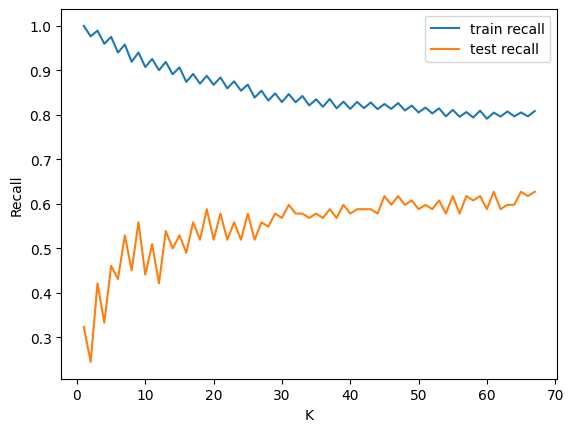

In [ ]:
k_values=range(1,68)
plt.plot(k_values,recall_tr,label='train recall')
plt.plot(k_values,recall_tst,label='test recall')
plt.xlabel('K')
plt.ylabel('Recall')
plt.legend()
plt.show()


In [ ]:
# Best value of k
best_k=recall_tst.index(max(recall_tst))
print(best_k)

60


In [ ]:
# ML Model - 2 Implementation with hyperparameter optimization techniques

param_grid={'n_neighbors':[36],
            'weights':['uniform','distance'],
            'metric':['minkowski','euclidiean','manhattan']}
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
knn=KNeighborsClassifier()
knn_grid=GridSearchCV(knn,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
knn_grid.fit(x_res_scaled_tr,y_res_tr)
print(knn_grid.best_params_)
knn_optimal=knn_grid.best_estimator_

{'metric': 'minkowski', 'n_neighbors': 36, 'weights': 'distance'}


 ROC-AUC score for train data is 1.0
 ROC-AUC score for test data is 0.6509225217864923


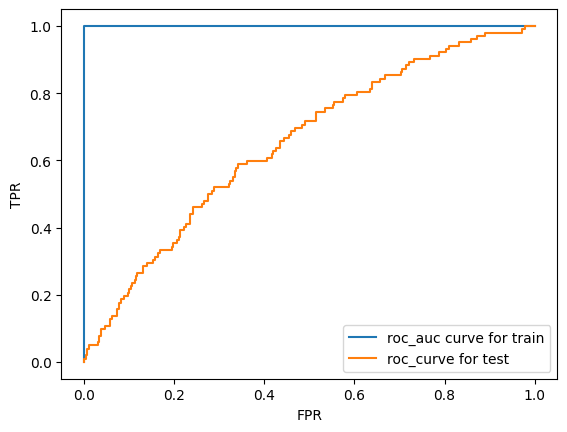

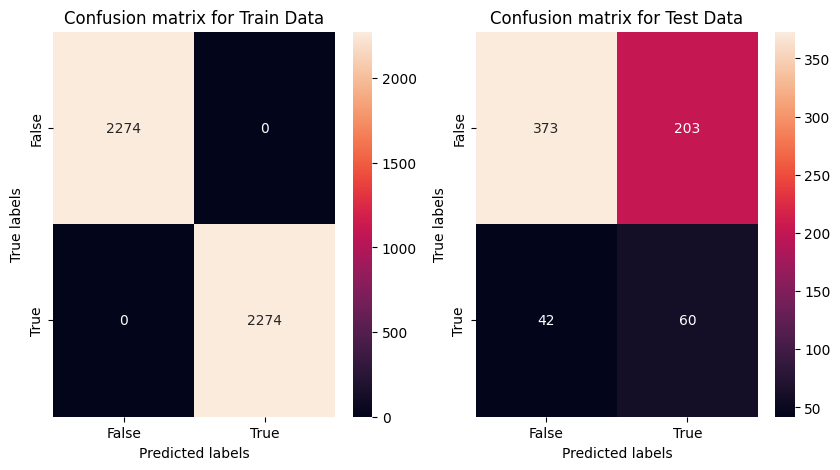



The classification report for train data is:

               precision  recall  f1-score  support
0                   1.0     1.0       1.0   2274.0
1                   1.0     1.0       1.0   2274.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   4548.0
weighted avg        1.0     1.0       1.0   4548.0


The classification report for test data is:

               precision    recall  f1-score     support
0              0.898795  0.647569  0.752775  576.000000
1              0.228137  0.588235  0.328767  102.000000
accuracy       0.638643  0.638643  0.638643    0.638643
macro avg      0.563466  0.617902  0.540771  678.000000
weighted avg   0.797900  0.638643  0.688986  678.000000


In [ ]:
# Visualizing evaluation metric score chart
knn_tuned=model_scores(knn_optimal,x_res_scaled_tr,x_scaled_tst,y_res_tr,y_test)

In [ ]:
# Evaluation metric score chart
model_df['KNearestNeighbors_tuned']=knn_tuned
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned
precision_train,0.710503,0.709957,0.896553,1.000000
precision_test,0.573934,0.576217,0.539061,0.563466
recall_train,0.729112,0.731750,0.975374,1.000000
recall_test,0.735294,0.735294,0.460784,0.588235
roc_auc_train,0.774545,0.770985,0.976006,1.000000
roc_auc_test,0.706801,0.707499,0.612251,0.650923
accuracy_train,0.710202,0.709543,0.883026,1.000000
accuracy_test,0.581121,0.588496,0.644543,0.638643
f1_train,0.710099,0.709399,0.882019,1.000000
f1_test,0.518798,0.524340,0.522277,0.540771


####From the above evaluation score chart we can see that the recall test score has improved after tuning, but the model has overfitted.

## 3. Naive Bayes

In [ ]:
# ML Model - 3 Implementation
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()

 ROC-AUC score for train data is 0.7593953366765448
 ROC-AUC score for test data is 0.6915083741830066


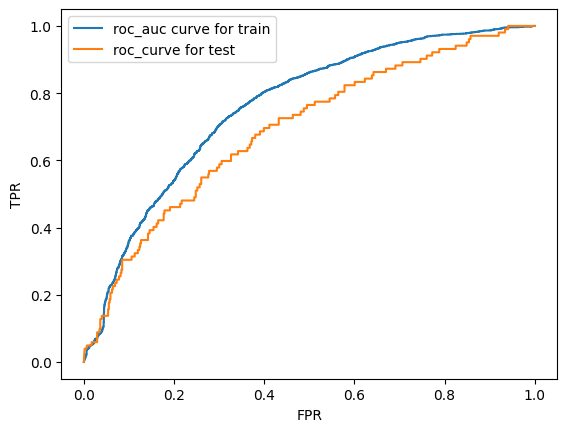

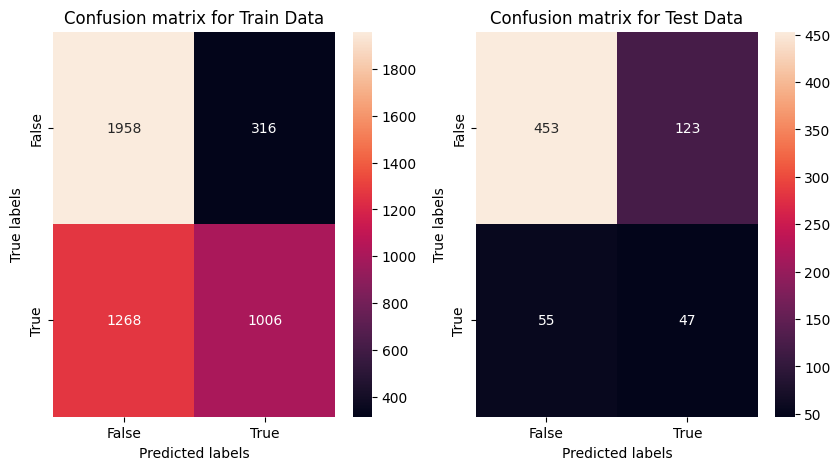



The classification report for train data is:

               precision    recall  f1-score      support
0              0.606944  0.861038  0.712000  2274.000000
1              0.760968  0.442392  0.559511  2274.000000
accuracy       0.651715  0.651715  0.651715     0.651715
macro avg      0.683956  0.651715  0.635755  4548.000000
weighted avg   0.683956  0.651715  0.635755  4548.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.891732  0.786458  0.835793  576.000000
1              0.276471  0.460784  0.345588  102.000000
accuracy       0.737463  0.737463  0.737463    0.737463
macro avg      0.584101  0.623621  0.590691  678.000000
weighted avg   0.799171  0.737463  0.762046  678.000000


In [ ]:
# Visualizing evaluation metric score chart
nb_model=model_scores(nb,x_res_scaled_tr,x_scaled_tst,y_res_tr,y_test)

In [ ]:
model_df['Naive Bayes']=nb_model
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned,Naive Bayes
precision_train,0.710503,0.709957,0.896553,1.000000,0.683956
precision_test,0.573934,0.576217,0.539061,0.563466,0.584101
recall_train,0.729112,0.731750,0.975374,1.000000,0.442392
recall_test,0.735294,0.735294,0.460784,0.588235,0.460784
roc_auc_train,0.774545,0.770985,0.976006,1.000000,0.759395
roc_auc_test,0.706801,0.707499,0.612251,0.650923,0.691508
accuracy_train,0.710202,0.709543,0.883026,1.000000,0.651715
accuracy_test,0.581121,0.588496,0.644543,0.638643,0.737463
f1_train,0.710099,0.709399,0.882019,1.000000,0.635755
f1_test,0.518798,0.524340,0.522277,0.540771,0.590691


##### This model does not seem to give good results, as the recall test score is less compared to previous models, need to do hyperparameter tuning.

 ### Cross-Validation & Hyperparameter Tuning for Naive Bayes

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
nb=GaussianNB()
nb_grid=GridSearchCV(nb,param_grid={'var_smoothing':np.logspace(0,-9,num=100)},cv=skf,scoring='recall')

# Fit the Algorithm
nb_grid.fit(x_res_scaled_tr,y_res_tr)
nb_optimal=nb_grid.best_estimator_

 ROC-AUC score for train data is 0.7560995042424439
 ROC-AUC score for test data is 0.6925891884531591


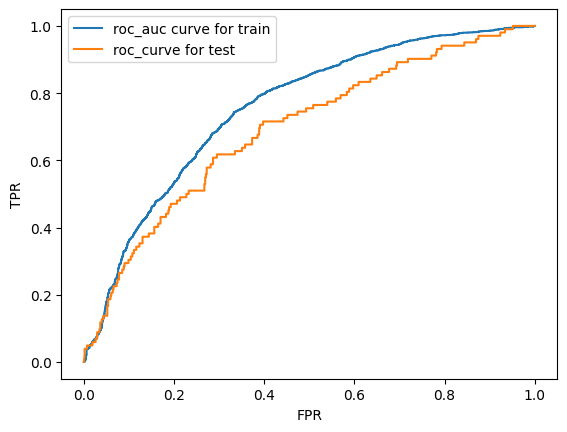

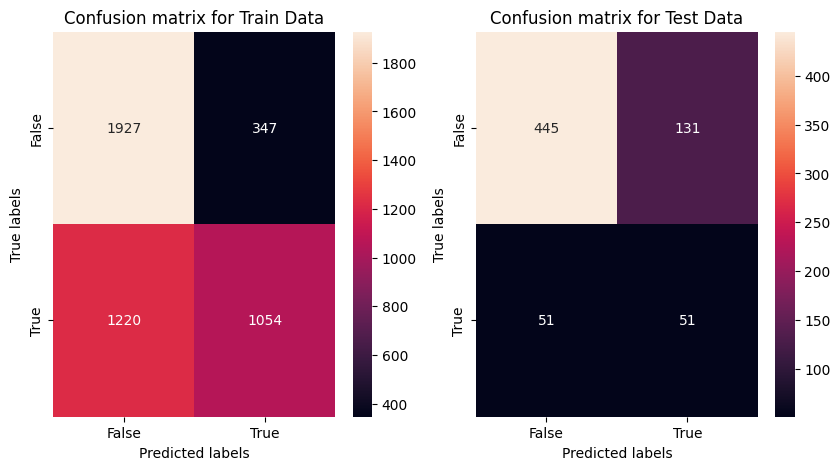



The classification report for train data is:

               precision    recall  f1-score      support
0              0.612329  0.847405  0.710939  2274.000000
1              0.752320  0.463500  0.573605  2274.000000
accuracy       0.655453  0.655453  0.655453     0.655453
macro avg      0.682324  0.655453  0.642272  4548.000000
weighted avg   0.682324  0.655453  0.642272  4548.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.897177  0.772569  0.830224  576.000000
1              0.280220  0.500000  0.359155  102.000000
accuracy       0.731563  0.731563  0.731563    0.731563
macro avg      0.588699  0.636285  0.594689  678.000000
weighted avg   0.804361  0.731563  0.759355  678.000000


In [ ]:
nb_model_cross_validated=model_scores(nb_optimal,x_res_scaled_tr,x_scaled_tst,y_res_tr,y_test)

In [ ]:
model_df['Naive Bayes_tuned']=nb_model_cross_validated
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned,Naive Bayes,Naive Bayes_tuned
precision_train,0.710503,0.709957,0.896553,1.000000,0.683956,0.682324
precision_test,0.573934,0.576217,0.539061,0.563466,0.584101,0.588699
recall_train,0.729112,0.731750,0.975374,1.000000,0.442392,0.463500
recall_test,0.735294,0.735294,0.460784,0.588235,0.460784,0.500000
roc_auc_train,0.774545,0.770985,0.976006,1.000000,0.759395,0.756100
roc_auc_test,0.706801,0.707499,0.612251,0.650923,0.691508,0.692589
accuracy_train,0.710202,0.709543,0.883026,1.000000,0.651715,0.655453
accuracy_test,0.581121,0.588496,0.644543,0.638643,0.737463,0.731563
f1_train,0.710099,0.709399,0.882019,1.000000,0.635755,0.642272
f1_test,0.518798,0.524340,0.522277,0.540771,0.590691,0.594689


There has been no significant change in the evaluation metric scores, which suggest that this model does not perform well for our problem.

## 4. Decision Tree

In [ ]:
# ML Model - 4 Implementation
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

 ROC-AUC score for train data is 1.0
 ROC-AUC score for test data is 0.4850388071895424


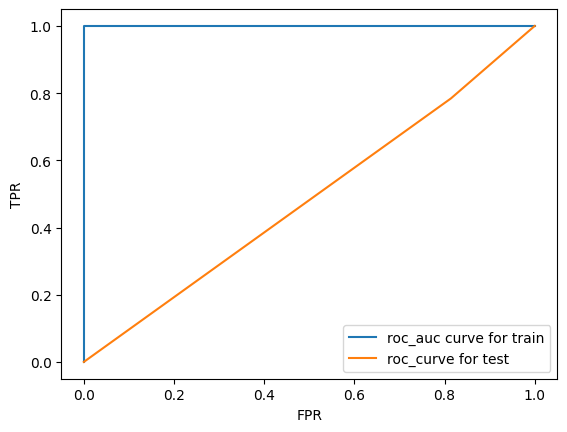

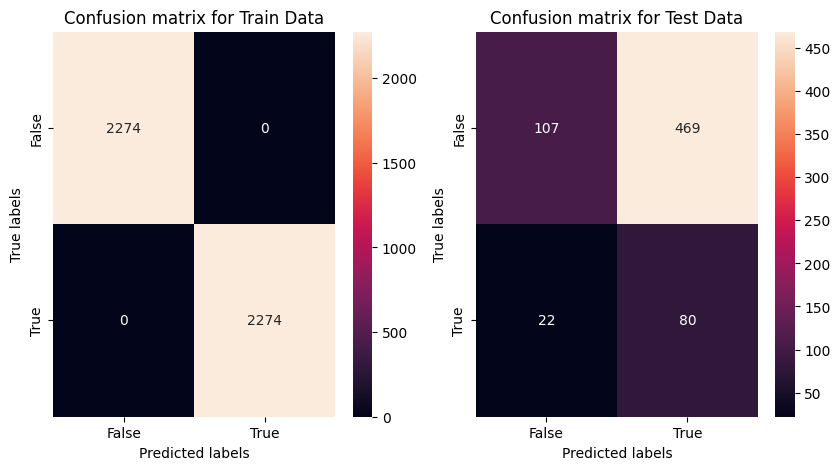



The classification report for train data is:

               precision  recall  f1-score  support
0                   1.0     1.0       1.0   2274.0
1                   1.0     1.0       1.0   2274.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   4548.0
weighted avg        1.0     1.0       1.0   4548.0


The classification report for test data is:

               precision    recall  f1-score     support
0              0.829457  0.185764  0.303546  576.000000
1              0.145719  0.784314  0.245776  102.000000
accuracy       0.275811  0.275811  0.275811    0.275811
macro avg      0.487588  0.485039  0.274661  678.000000
weighted avg   0.726594  0.275811  0.294855  678.000000


In [ ]:
dt_model=model_scores(dt,x_res_scaled_tr,x_scaled_tst,y_res_tr,y_test)

In [ ]:
model_df['Decision Tree']=dt_model
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned,Naive Bayes,Naive Bayes_tuned,Decision Tree
precision_train,0.710503,0.709957,0.896553,1.000000,0.683956,0.682324,1.000000
precision_test,0.573934,0.576217,0.539061,0.563466,0.584101,0.588699,0.487588
recall_train,0.729112,0.731750,0.975374,1.000000,0.442392,0.463500,1.000000
recall_test,0.735294,0.735294,0.460784,0.588235,0.460784,0.500000,0.784314
roc_auc_train,0.774545,0.770985,0.976006,1.000000,0.759395,0.756100,1.000000
roc_auc_test,0.706801,0.707499,0.612251,0.650923,0.691508,0.692589,0.485039
accuracy_train,0.710202,0.709543,0.883026,1.000000,0.651715,0.655453,1.000000
accuracy_test,0.581121,0.588496,0.644543,0.638643,0.737463,0.731563,0.275811
f1_train,0.710099,0.709399,0.882019,1.000000,0.635755,0.642272,1.000000
f1_test,0.518798,0.524340,0.522277,0.540771,0.590691,0.594689,0.274661


##### Looking at the model's performance it seems to have been overfitted, need to do cross validation and hyperparameter tuning.

### Cross-Validation & Hyperparameter Tuning for Decision Tree

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques
param_grid = {'max_depth' : [5,6,7,8,9,10],
        'min_samples_split' : [2,3,4,5,6,7,8,9,10],
        'min_samples_leaf' : np.arange(10,20)}
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
dt=DecisionTreeClassifier()

dt_grid=GridSearchCV(dt,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
dt_grid.fit(x_res_scaled_tr,y_res_tr)
dt_optimal=dt_grid.best_estimator_

In [ ]:
dt_grid.best_params_

{'max_depth': 10, 'min_samples_leaf': 11, 'min_samples_split': 8}

 ROC-AUC score for train data is 0.9529643346955257
 ROC-AUC score for test data is 0.46612030228758167


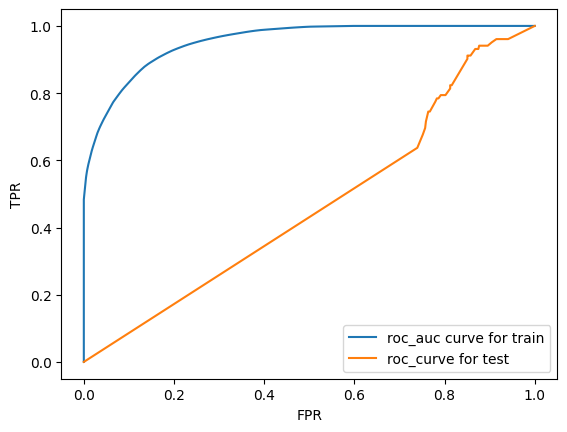

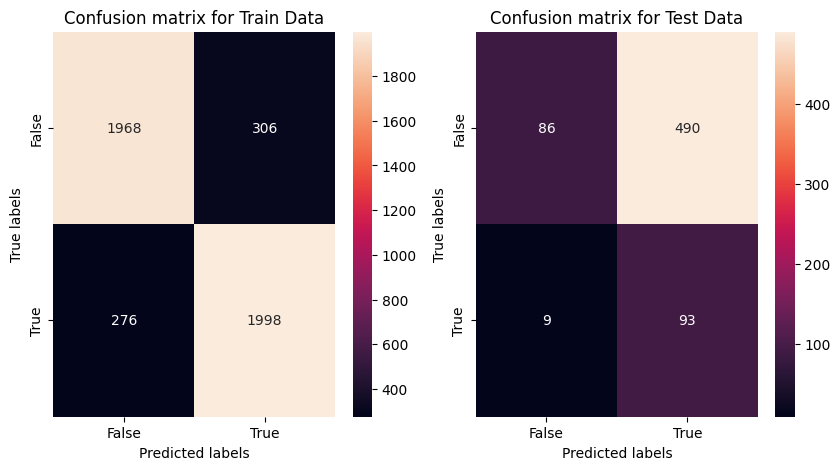



The classification report for train data is:

               precision    recall  f1-score      support
0              0.877005  0.865435  0.871182  2274.000000
1              0.867188  0.878628  0.872870  2274.000000
accuracy       0.872032  0.872032  0.872032     0.872032
macro avg      0.872096  0.872032  0.872026  4548.000000
weighted avg   0.872096  0.872032  0.872026  4548.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.905263  0.149306  0.256334  576.000000
1              0.159520  0.911765  0.271533  102.000000
accuracy       0.264012  0.264012  0.264012    0.264012
macro avg      0.532391  0.530535  0.263933  678.000000
weighted avg   0.793072  0.264012  0.258620  678.000000


In [ ]:
dt_model_cross_validated=model_scores(dt_optimal,x_res_scaled_tr,x_scaled_tst,y_res_tr,y_test)

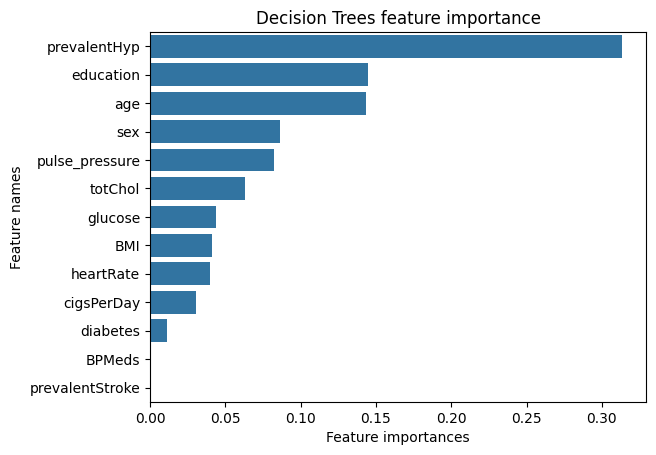

In [ ]:
feature_importances(dt_optimal,x.columns,'Decision Trees')

In [ ]:
model_df['Decision Trees tuned']=dt_model_cross_validated
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned,Naive Bayes,Naive Bayes_tuned,Decision Tree,Decision Trees tuned
precision_train,0.710503,0.709957,0.896553,1.000000,0.683956,0.682324,1.000000,0.872096
precision_test,0.573934,0.576217,0.539061,0.563466,0.584101,0.588699,0.487588,0.532391
recall_train,0.729112,0.731750,0.975374,1.000000,0.442392,0.463500,1.000000,0.878628
recall_test,0.735294,0.735294,0.460784,0.588235,0.460784,0.500000,0.784314,0.911765
roc_auc_train,0.774545,0.770985,0.976006,1.000000,0.759395,0.756100,1.000000,0.952964
roc_auc_test,0.706801,0.707499,0.612251,0.650923,0.691508,0.692589,0.485039,0.466120
accuracy_train,0.710202,0.709543,0.883026,1.000000,0.651715,0.655453,1.000000,0.872032
accuracy_test,0.581121,0.588496,0.644543,0.638643,0.737463,0.731563,0.275811,0.264012
f1_train,0.710099,0.709399,0.882019,1.000000,0.635755,0.642272,1.000000,0.872026
f1_test,0.518798,0.524340,0.522277,0.540771,0.590691,0.594689,0.274661,0.263933


####Yes, there has been a significant improvement, and the model is not overfitting anymore. The recall score has improved.

## 5. Random Forest

In [ ]:
# ML Model - 5 Implementation
rf=RandomForestClassifier()

 ROC-AUC score for train data is 1.0
 ROC-AUC score for test data is 0.5225268927015251


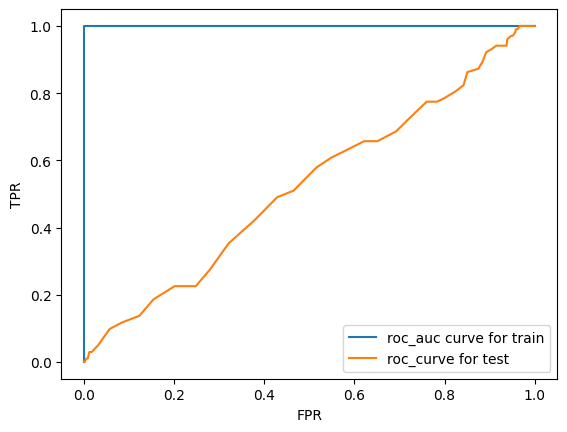

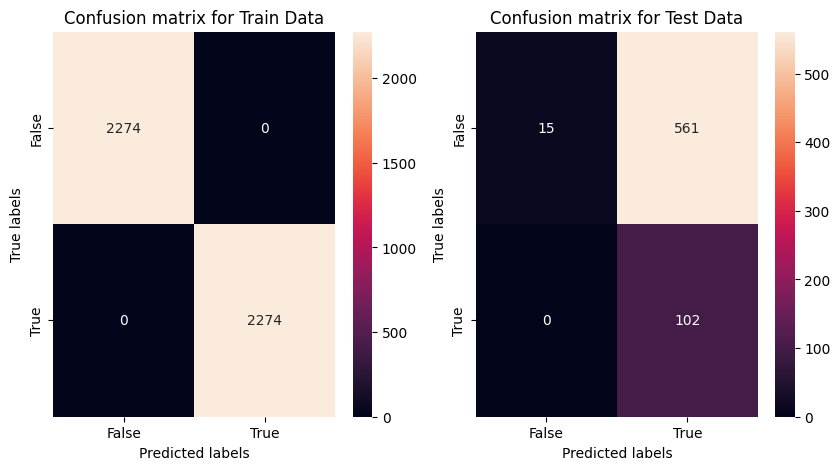



The classification report for train data is:

               precision  recall  f1-score  support
0                   1.0     1.0       1.0   2274.0
1                   1.0     1.0       1.0   2274.0
accuracy            1.0     1.0       1.0      1.0
macro avg           1.0     1.0       1.0   4548.0
weighted avg        1.0     1.0       1.0   4548.0


The classification report for test data is:

               precision    recall  f1-score     support
0              1.000000  0.026042  0.050761  576.000000
1              0.153846  1.000000  0.266667  102.000000
accuracy       0.172566  0.172566  0.172566    0.172566
macro avg      0.576923  0.513021  0.158714  678.000000
weighted avg   0.872703  0.172566  0.083243  678.000000


In [ ]:
rf_model=model_scores(rf,x_res_scaled_tr,x_scaled_tst,y_res_tr,y_test)

In [ ]:
model_df['RandomForest']=rf_model
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned,Naive Bayes,Naive Bayes_tuned,Decision Tree,Decision Trees tuned,RandomForest
precision_train,0.710503,0.709957,0.896553,1.000000,0.683956,0.682324,1.000000,0.872096,1.000000
precision_test,0.573934,0.576217,0.539061,0.563466,0.584101,0.588699,0.487588,0.532391,0.576923
recall_train,0.729112,0.731750,0.975374,1.000000,0.442392,0.463500,1.000000,0.878628,1.000000
recall_test,0.735294,0.735294,0.460784,0.588235,0.460784,0.500000,0.784314,0.911765,1.000000
roc_auc_train,0.774545,0.770985,0.976006,1.000000,0.759395,0.756100,1.000000,0.952964,1.000000
roc_auc_test,0.706801,0.707499,0.612251,0.650923,0.691508,0.692589,0.485039,0.466120,0.522527
accuracy_train,0.710202,0.709543,0.883026,1.000000,0.651715,0.655453,1.000000,0.872032,1.000000
accuracy_test,0.581121,0.588496,0.644543,0.638643,0.737463,0.731563,0.275811,0.264012,0.172566
f1_train,0.710099,0.709399,0.882019,1.000000,0.635755,0.642272,1.000000,0.872026,1.000000
f1_test,0.518798,0.524340,0.522277,0.540771,0.590691,0.594689,0.274661,0.263933,0.158714


##### Looking at the model's performance it seems to have been overfitted, need to do cross validation and hyperparameter tuning.

### Cross-Validation & Hyperparameter Tuning for Random Forest

In [ ]:
# ML Model - 5 Implementation with hyperparameter optimization techniques
param_grid = {'n_estimators' : [50,100,150,200,250],
        'max_depth' : [5,8,10,12,15,17],
        'min_samples_split' : [2,3,4,5]}
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
rf=RandomForestClassifier()

rf_grid=GridSearchCV(rf,param_grid=param_grid,cv=skf,scoring='recall')

# Fit the Algorithm
rf_grid.fit(x_res_scaled_tr,y_res_tr)
rf_optimal=rf_grid.best_estimator_

In [ ]:
rf_grid.best_params_

{'max_depth': 17, 'min_samples_split': 2, 'n_estimators': 250}

 ROC-AUC score for train data is 1.0
 ROC-AUC score for test data is 0.5209099264705883


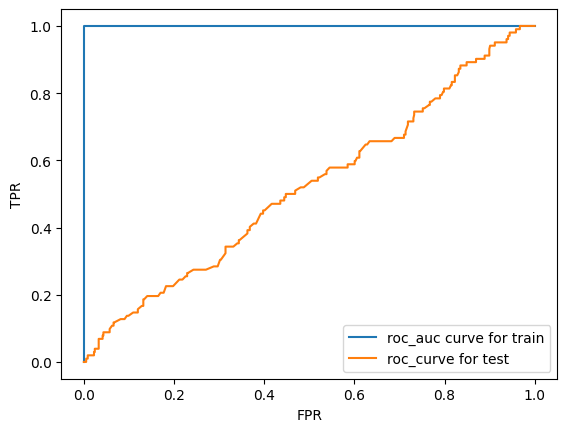

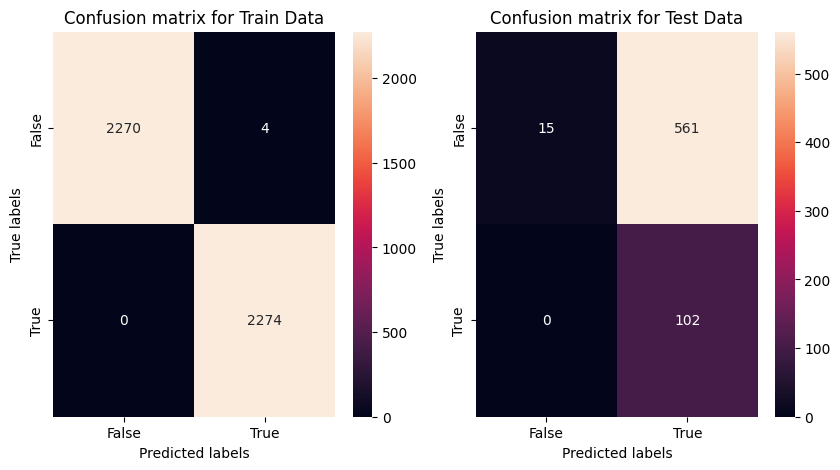



The classification report for train data is:

               precision    recall  f1-score     support
0              1.000000  0.998241  0.999120  2274.00000
1              0.998244  1.000000  0.999121  2274.00000
accuracy       0.999120  0.999120  0.999120     0.99912
macro avg      0.999122  0.999120  0.999120  4548.00000
weighted avg   0.999122  0.999120  0.999120  4548.00000


The classification report for test data is:

               precision    recall  f1-score     support
0              1.000000  0.026042  0.050761  576.000000
1              0.153846  1.000000  0.266667  102.000000
accuracy       0.172566  0.172566  0.172566    0.172566
macro avg      0.576923  0.513021  0.158714  678.000000
weighted avg   0.872703  0.172566  0.083243  678.000000


In [ ]:
rf_model_cross_validated=model_scores(rf_optimal,x_res_scaled_tr,x_scaled_tst,y_res_tr,y_test)

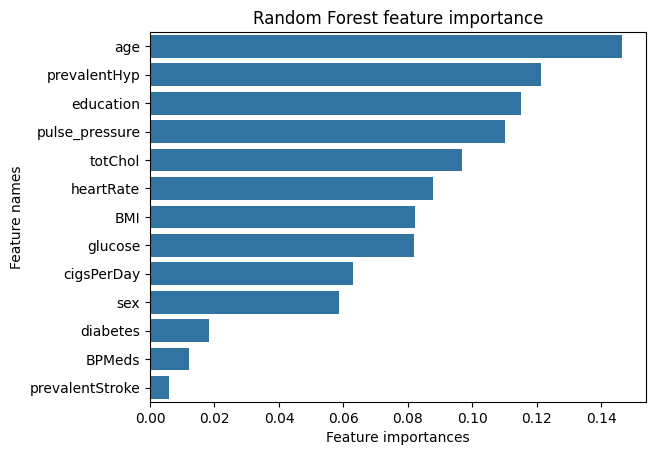

In [ ]:
feature_importances(rf_optimal,x.columns,'Random Forest')

In [ ]:
model_df['RandomForestTuned']=rf_model_cross_validated
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned,Naive Bayes,Naive Bayes_tuned,Decision Tree,Decision Trees tuned,RandomForest,RandomForestTuned
precision_train,0.710503,0.709957,0.896553,1.000000,0.683956,0.682324,1.000000,0.872096,1.000000,0.999122
precision_test,0.573934,0.576217,0.539061,0.563466,0.584101,0.588699,0.487588,0.532391,0.576923,0.576923
recall_train,0.729112,0.731750,0.975374,1.000000,0.442392,0.463500,1.000000,0.878628,1.000000,1.000000
recall_test,0.735294,0.735294,0.460784,0.588235,0.460784,0.500000,0.784314,0.911765,1.000000,1.000000
roc_auc_train,0.774545,0.770985,0.976006,1.000000,0.759395,0.756100,1.000000,0.952964,1.000000,1.000000
roc_auc_test,0.706801,0.707499,0.612251,0.650923,0.691508,0.692589,0.485039,0.466120,0.522527,0.520910
accuracy_train,0.710202,0.709543,0.883026,1.000000,0.651715,0.655453,1.000000,0.872032,1.000000,0.999120
accuracy_test,0.581121,0.588496,0.644543,0.638643,0.737463,0.731563,0.275811,0.264012,0.172566,0.172566
f1_train,0.710099,0.709399,0.882019,1.000000,0.635755,0.642272,1.000000,0.872026,1.000000,0.999120
f1_test,0.518798,0.524340,0.522277,0.540771,0.590691,0.594689,0.274661,0.263933,0.158714,0.158714


####There is no significant improvement in the evaluation metric scores, and the model seems to have overfitted.

## 6. SVM (Support Vector Machine)

In [ ]:
# ML Model - 6 Implementation
from sklearn.svm import SVC
svc = SVC(probability=True)

 ROC-AUC score for train data is 0.8982627600135832
 ROC-AUC score for test data is 0.600524237472767


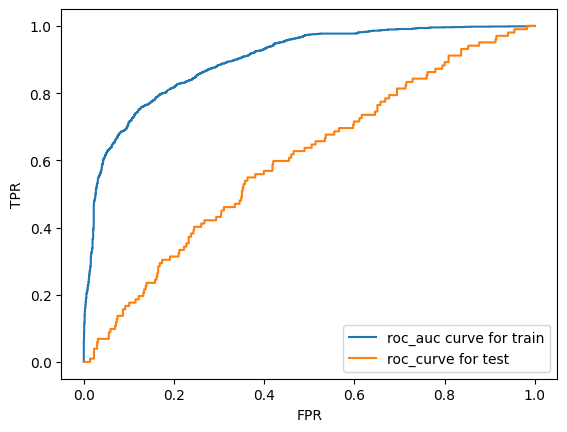

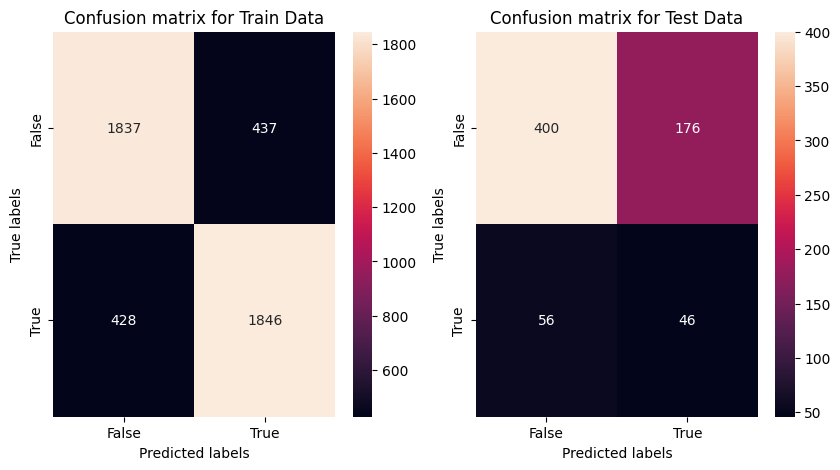



The classification report for train data is:

               precision    recall  f1-score      support
0              0.811038  0.807828  0.809429  2274.000000
1              0.808585  0.811785  0.810182  2274.000000
accuracy       0.809807  0.809807  0.809807     0.809807
macro avg      0.809811  0.809807  0.809806  4548.000000
weighted avg   0.809811  0.809807  0.809806  4548.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.877193  0.694444  0.775194  576.000000
1              0.207207  0.450980  0.283951  102.000000
accuracy       0.657817  0.657817  0.657817    0.657817
macro avg      0.542200  0.572712  0.529572  678.000000
weighted avg   0.776399  0.657817  0.701290  678.000000


In [ ]:
svc_model=model_scores(svc,x_res_scaled_tr,x_scaled_tst,y_res_tr,y_test)

In [ ]:
model_df['SVM']=svc_model
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned,Naive Bayes,Naive Bayes_tuned,Decision Tree,Decision Trees tuned,RandomForest,RandomForestTuned,SVM
precision_train,0.710503,0.709957,0.896553,1.000000,0.683956,0.682324,1.000000,0.872096,1.000000,0.999122,0.809811
precision_test,0.573934,0.576217,0.539061,0.563466,0.584101,0.588699,0.487588,0.532391,0.576923,0.576923,0.542200
recall_train,0.729112,0.731750,0.975374,1.000000,0.442392,0.463500,1.000000,0.878628,1.000000,1.000000,0.811785
recall_test,0.735294,0.735294,0.460784,0.588235,0.460784,0.500000,0.784314,0.911765,1.000000,1.000000,0.450980
roc_auc_train,0.774545,0.770985,0.976006,1.000000,0.759395,0.756100,1.000000,0.952964,1.000000,1.000000,0.898263
roc_auc_test,0.706801,0.707499,0.612251,0.650923,0.691508,0.692589,0.485039,0.466120,0.522527,0.520910,0.600524
accuracy_train,0.710202,0.709543,0.883026,1.000000,0.651715,0.655453,1.000000,0.872032,1.000000,0.999120,0.809807
accuracy_test,0.581121,0.588496,0.644543,0.638643,0.737463,0.731563,0.275811,0.264012,0.172566,0.172566,0.657817
f1_train,0.710099,0.709399,0.882019,1.000000,0.635755,0.642272,1.000000,0.872026,1.000000,0.999120,0.809806
f1_test,0.518798,0.524340,0.522277,0.540771,0.590691,0.594689,0.274661,0.263933,0.158714,0.158714,0.529572


 ##### Looking at the model's performance model seems to have been slightly overfitted, need to do cross validation and hyperparameter tuning.

### Cross-Validation & Hyperparameter Tuning for SVM

In [ ]:
# ML Model - 6 Implementation with hyperparameter optimization techniques
param_grid = {'C': [0.1, 1, 10],
              'gamma': [0.01, 0.001, 0.0001],
              'kernel': ['rbf']
             }
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
svc=SVC(probability=True)

svc_grid=GridSearchCV(svc,param_grid=param_grid,cv=skf,scoring='recall',verbose=2)

# Fit the Algorithm
svc_grid.fit(x_res_scaled_tr,y_res_tr)
svc_optimal=svc_grid.best_estimator_


Fitting 4 folds for each of 9 candidates, totalling 36 fits
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.0s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   4.2s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   3.4s
[CV] END ......................C=0.1, gamma=0.01, kernel=rbf; total time=   2.9s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   3.5s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   5.0s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   3.7s
[CV] END .....................C=0.1, gamma=0.001, kernel=rbf; total time=   3.5s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   3.9s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   4.9s
[CV] END ....................C=0.1, gamma=0.0001, kernel=rbf; total time=   3.6s
[CV] END ....................C=0.1, gamma=0.0001,

In [ ]:
svc_grid.best_params_

{'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}

 ROC-AUC score for train data is 0.7820041708920928
 ROC-AUC score for test data is 0.7036015795206971


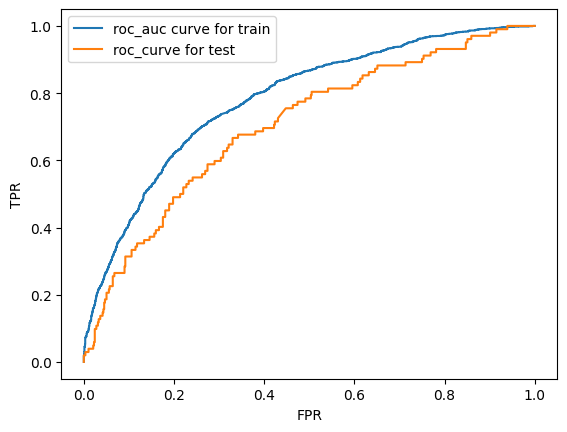

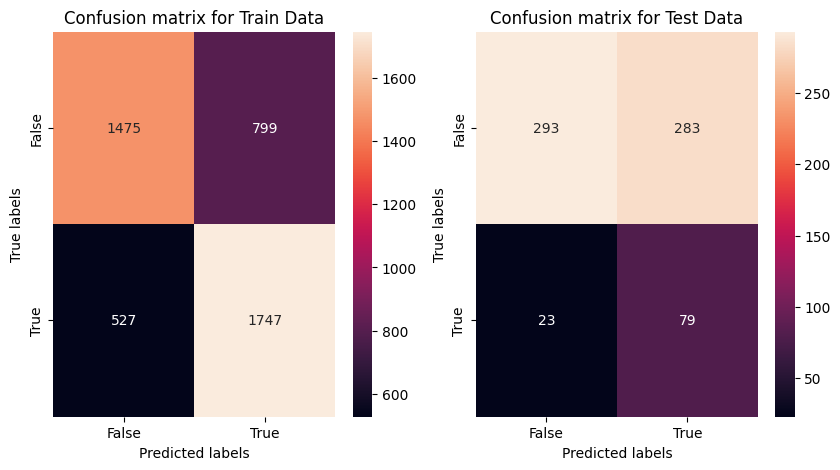



The classification report for train data is:

               precision    recall  f1-score      support
0              0.736763  0.648637  0.689897  2274.000000
1              0.686174  0.768250  0.724896  2274.000000
accuracy       0.708443  0.708443  0.708443     0.708443
macro avg      0.711469  0.708443  0.707397  4548.000000
weighted avg   0.711469  0.708443  0.707397  4548.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.927215  0.508681  0.656951  576.000000
1              0.218232  0.774510  0.340517  102.000000
accuracy       0.548673  0.548673  0.548673    0.548673
macro avg      0.572724  0.641595  0.498734  678.000000
weighted avg   0.820554  0.548673  0.609346  678.000000


In [ ]:
svc_model_cross_validated=model_scores(svc_optimal,x_res_scaled_tr,x_scaled_tst,y_res_tr,y_test)

In [ ]:
model_df['SVM tuned']=svc_model_cross_validated
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned,Naive Bayes,Naive Bayes_tuned,Decision Tree,Decision Trees tuned,RandomForest,RandomForestTuned,SVM,SVM tuned
precision_train,0.710503,0.709957,0.896553,1.000000,0.683956,0.682324,1.000000,0.872096,1.000000,0.999122,0.809811,0.711469
precision_test,0.573934,0.576217,0.539061,0.563466,0.584101,0.588699,0.487588,0.532391,0.576923,0.576923,0.542200,0.572724
recall_train,0.729112,0.731750,0.975374,1.000000,0.442392,0.463500,1.000000,0.878628,1.000000,1.000000,0.811785,0.768250
recall_test,0.735294,0.735294,0.460784,0.588235,0.460784,0.500000,0.784314,0.911765,1.000000,1.000000,0.450980,0.774510
roc_auc_train,0.774545,0.770985,0.976006,1.000000,0.759395,0.756100,1.000000,0.952964,1.000000,1.000000,0.898263,0.782004
roc_auc_test,0.706801,0.707499,0.612251,0.650923,0.691508,0.692589,0.485039,0.466120,0.522527,0.520910,0.600524,0.703602
accuracy_train,0.710202,0.709543,0.883026,1.000000,0.651715,0.655453,1.000000,0.872032,1.000000,0.999120,0.809807,0.708443
accuracy_test,0.581121,0.588496,0.644543,0.638643,0.737463,0.731563,0.275811,0.264012,0.172566,0.172566,0.657817,0.548673
f1_train,0.710099,0.709399,0.882019,1.000000,0.635755,0.642272,1.000000,0.872026,1.000000,0.999120,0.809806,0.707397
f1_test,0.518798,0.524340,0.522277,0.540771,0.590691,0.594689,0.274661,0.263933,0.158714,0.158714,0.529572,0.498734


####After cross-validation and hyperparameter tuning, the model does not overfit anymore and there is significant change in recall score.

## 7. XGBoost

In [ ]:
# ML Model - 7 Implementation
import xgboost as xgb
xgb_mod=xgb.XGBClassifier(random_state=0)

 ROC-AUC score for train data is 0.9999580358130493
 ROC-AUC score for test data is 0.494144880174292


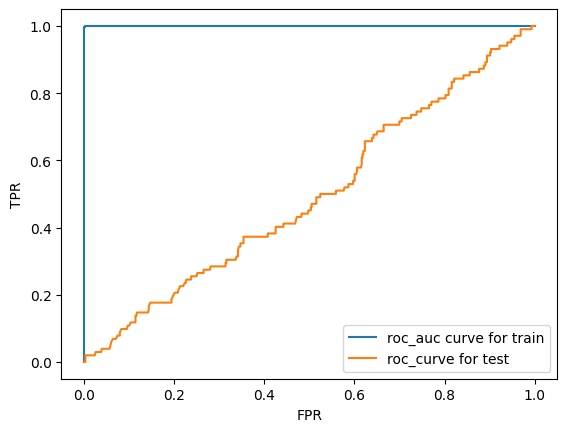

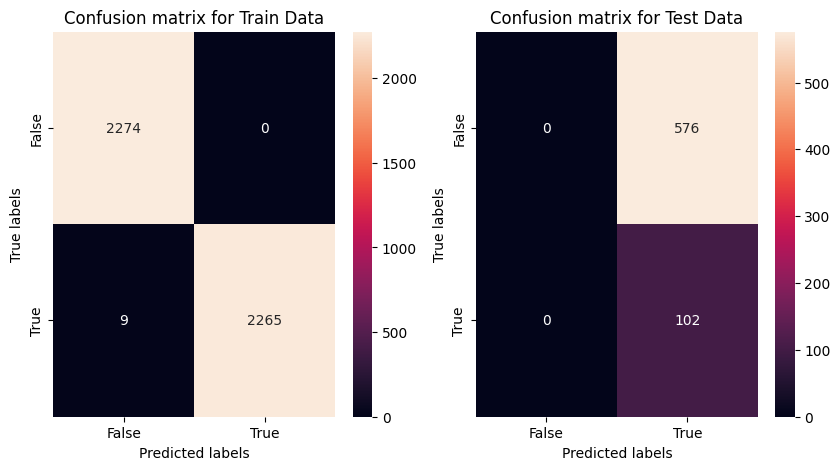



The classification report for train data is:

               precision    recall  f1-score      support
0              0.996058  1.000000  0.998025  2274.000000
1              1.000000  0.996042  0.998017  2274.000000
accuracy       0.998021  0.998021  0.998021     0.998021
macro avg      0.998029  0.998021  0.998021  4548.000000
weighted avg   0.998029  0.998021  0.998021  4548.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.000000  0.000000  0.000000  576.000000
1              0.150442  1.000000  0.261538  102.000000
accuracy       0.150442  0.150442  0.150442    0.150442
macro avg      0.075221  0.500000  0.130769  678.000000
weighted avg   0.022633  0.150442  0.039346  678.000000


In [ ]:
xgb_model=model_scores(xgb_mod,x_res_scaled_tr,x_scaled_tst,y_res_tr,y_test)

In [ ]:
model_df['XG Boost']=xgb_model
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned,Naive Bayes,Naive Bayes_tuned,Decision Tree,Decision Trees tuned,RandomForest,RandomForestTuned,SVM,SVM tuned,XG Boost
precision_train,0.710503,0.709957,0.896553,1.000000,0.683956,0.682324,1.000000,0.872096,1.000000,0.999122,0.809811,0.711469,0.998029
precision_test,0.573934,0.576217,0.539061,0.563466,0.584101,0.588699,0.487588,0.532391,0.576923,0.576923,0.542200,0.572724,0.075221
recall_train,0.729112,0.731750,0.975374,1.000000,0.442392,0.463500,1.000000,0.878628,1.000000,1.000000,0.811785,0.768250,0.996042
recall_test,0.735294,0.735294,0.460784,0.588235,0.460784,0.500000,0.784314,0.911765,1.000000,1.000000,0.450980,0.774510,1.000000
roc_auc_train,0.774545,0.770985,0.976006,1.000000,0.759395,0.756100,1.000000,0.952964,1.000000,1.000000,0.898263,0.782004,0.999958
roc_auc_test,0.706801,0.707499,0.612251,0.650923,0.691508,0.692589,0.485039,0.466120,0.522527,0.520910,0.600524,0.703602,0.494145
accuracy_train,0.710202,0.709543,0.883026,1.000000,0.651715,0.655453,1.000000,0.872032,1.000000,0.999120,0.809807,0.708443,0.998021
accuracy_test,0.581121,0.588496,0.644543,0.638643,0.737463,0.731563,0.275811,0.264012,0.172566,0.172566,0.657817,0.548673,0.150442
f1_train,0.710099,0.709399,0.882019,1.000000,0.635755,0.642272,1.000000,0.872026,1.000000,0.999120,0.809806,0.707397,0.998021
f1_test,0.518798,0.524340,0.522277,0.540771,0.590691,0.594689,0.274661,0.263933,0.158714,0.158714,0.529572,0.498734,0.130769


##### Looking at the model's performance it seems to have been overfitted, need to do cross validation and hyperparameter tuning.

### Cross-Validation & Hyperparameter Tuning for XGBoost

In [ ]:
# ML Model - 7 Implementation with hyperparameter optimization techniques
param_grid = {'learning_rate': np.arange(0.1,0.3,0.05),
              'max_depth':[2,3],
              'n_estimators': (100,150,200)
             }
skf=StratifiedKFold(n_splits=4,shuffle=True,random_state=0)
xgb_mod=xgb.XGBClassifier(random_state=0)

xgb_grid=GridSearchCV(xgb_mod,param_grid=param_grid,cv=skf,scoring='f1')

# Fit the Algorithm
xgb_grid.fit(x_res_scaled_tr,y_res_tr)
xgb_optimal=xgb_grid.best_estimator_


In [ ]:
xgb_grid.best_params_

{'learning_rate': 0.25000000000000006, 'max_depth': 3, 'n_estimators': 200}

 ROC-AUC score for train data is 0.9886048861010744
 ROC-AUC score for test data is 0.44307427832243995


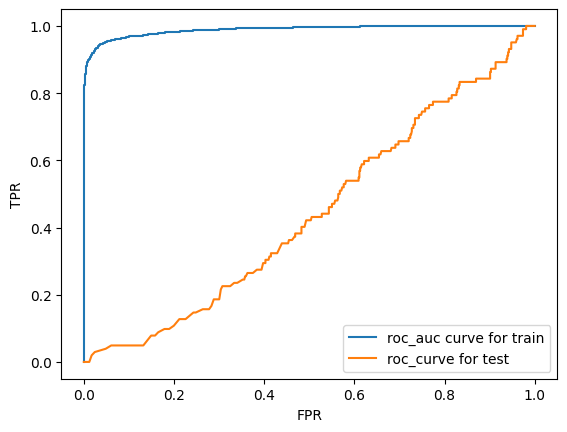

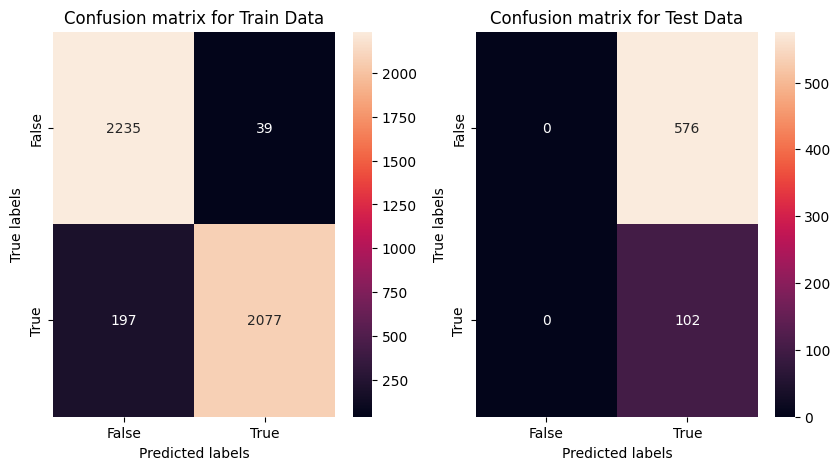



The classification report for train data is:

               precision    recall  f1-score      support
0              0.918997  0.982850  0.949851  2274.000000
1              0.981569  0.913369  0.946241  2274.000000
accuracy       0.948109  0.948109  0.948109     0.948109
macro avg      0.950283  0.948109  0.948046  4548.000000
weighted avg   0.950283  0.948109  0.948046  4548.000000


The classification report for test data is:

               precision    recall  f1-score     support
0              0.000000  0.000000  0.000000  576.000000
1              0.150442  1.000000  0.261538  102.000000
accuracy       0.150442  0.150442  0.150442    0.150442
macro avg      0.075221  0.500000  0.130769  678.000000
weighted avg   0.022633  0.150442  0.039346  678.000000


In [ ]:
xgb_model_cross_validated=model_scores(xgb_optimal,x_res_scaled_tr,x_scaled_tst,y_res_tr,y_test)

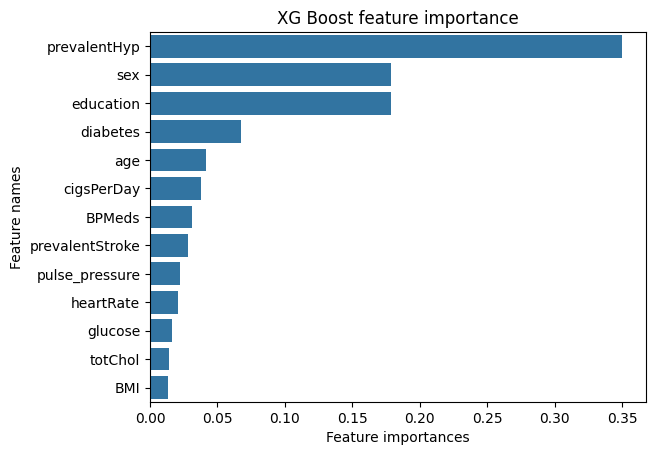

In [ ]:
feature_importances(xgb_optimal,x.columns,'XG Boost')

In [ ]:
model_df['XGBoost tuned']=xgb_model_cross_validated
model_df

,Logistic Regression,Logistic Regression tuned,KNearestNeighbors,KNearestNeighbors_tuned,Naive Bayes,Naive Bayes_tuned,Decision Tree,Decision Trees tuned,RandomForest,RandomForestTuned,SVM,SVM tuned,XG Boost,XGBoost tuned
precision_train,0.710503,0.709957,0.896553,1.000000,0.683956,0.682324,1.000000,0.872096,1.000000,0.999122,0.809811,0.711469,0.998029,0.950283
precision_test,0.573934,0.576217,0.539061,0.563466,0.584101,0.588699,0.487588,0.532391,0.576923,0.576923,0.542200,0.572724,0.075221,0.075221
recall_train,0.729112,0.731750,0.975374,1.000000,0.442392,0.463500,1.000000,0.878628,1.000000,1.000000,0.811785,0.768250,0.996042,0.913369
recall_test,0.735294,0.735294,0.460784,0.588235,0.460784,0.500000,0.784314,0.911765,1.000000,1.000000,0.450980,0.774510,1.000000,1.000000
roc_auc_train,0.774545,0.770985,0.976006,1.000000,0.759395,0.756100,1.000000,0.952964,1.000000,1.000000,0.898263,0.782004,0.999958,0.988605
roc_auc_test,0.706801,0.707499,0.612251,0.650923,0.691508,0.692589,0.485039,0.466120,0.522527,0.520910,0.600524,0.703602,0.494145,0.443074
accuracy_train,0.710202,0.709543,0.883026,1.000000,0.651715,0.655453,1.000000,0.872032,1.000000,0.999120,0.809807,0.708443,0.998021,0.948109
accuracy_test,0.581121,0.588496,0.644543,0.638643,0.737463,0.731563,0.275811,0.264012,0.172566,0.172566,0.657817,0.548673,0.150442,0.150442
f1_train,0.710099,0.709399,0.882019,1.000000,0.635755,0.642272,1.000000,0.872026,1.000000,0.999120,0.809806,0.707397,0.998021,0.948046
f1_test,0.518798,0.524340,0.522277,0.540771,0.590691,0.594689,0.274661,0.263933,0.158714,0.158714,0.529572,0.498734,0.130769,0.130769


#### There seems to be no significant improvement, and model seems to have overfitted.

### By implementing above 7 machine learning algorithms and performing cross-validation and hyperparameter tuning we found following results:
* #### We have chosen the recall score as our primary metric because our priority is to predict as many positive labels as possible. It is okay if it is not able to predict good negative labels, but we want high true positive labels for that we need high recall.
* #### We have used several ML models for our prediction. Models such as KNN, XGboost, Random Forest have overfitted even after tuning them. But models such as Logistic Regression, Naive Bayes, Decision Trees, SVM showed no signs of overfitting and have given good recall results.

### Let's look at the scores of the models which are not overfitted.

In [ ]:
best_models=model_df.loc[['recall_train','recall_test','f1_train','f1_test'],['Logistic Regression tuned','Naive Bayes_tuned','Decision Trees tuned','SVM tuned']].T

In [ ]:
best_models

,recall_train,recall_test,f1_train,f1_test
Logistic Regression tuned,0.731750,0.735294,0.709399,0.524340
Naive Bayes_tuned,0.463500,0.500000,0.642272,0.594689
Decision Trees tuned,0.878628,0.911765,0.872026,0.263933
SVM tuned,0.768250,0.774510,0.707397,0.498734


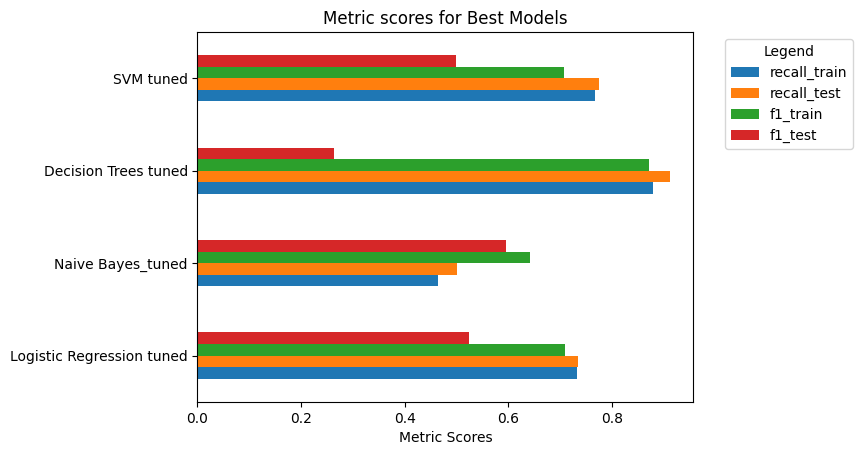

In [ ]:
best_models.plot(kind='barh',y=['recall_train','recall_test','f1_train','f1_test'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',title='Legend')
plt.xlabel('Metric Scores')
plt.title("Metric scores for Best Models")
plt.show()

### When we examine the scores, it's evident that both the Decision Tree and SVM models have achieved high metric scores.

# **Conclusion**


* #### For performing the 10-year risk of CHD, we have trained multiple machine learning models using the training dataset and also performed cross-validation and hyperparameter tuning to enhance model performance. ####
* #### Our modeling process involved handling missing values, treating outliers, performing feature engineering and selection, and oversampling the training dataset using SMOTE to mitigate bias towards a single outcome. ####
* #### Given the importance of reducing false negatives, we selected recall as the primary evaluation metric for our models. ####
* #### Ensuring a high recall score is paramount; while misclassifying a healthy patient as high-risk may not be critical, erroneously labeling a high-risk patient as healthy could lead to fatal outcomes. ####
* #### Among all models considered, Decision Trees and SVM emerged as the top performers, achieving recall scores of 0.91 and 0.77, respectively. ####
* #### Future iterations of our model development should prioritize strategies to enhance both recall and F1 scores, thereby potentially saving more lives. This could involve broadening the study cohort to include individuals with diverse medical histories and building an application optimized for improved recall and F1 scores. ####
* #### The important factors that contribute to the risk of developing coronary heart disease include hypertension, age, education level, sex, cholesterol, pulse pressure, BMI and heart rate. ####
* #### Diabetes, Prevalent stroke and BP medication were the least important features in determining the risk of CHD. ####